In [1]:
!pip install kagglehub


In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
mrwellsdavid_unsw_nb15_path = kagglehub.dataset_download('mrwellsdavid/unsw-nb15')

print('Data source import complete.')


Data source import complete.


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/UNSW_NB15_testing-set.csv
/kaggle/input/UNSW-NB15_1.csv
/kaggle/input/UNSW_NB15_training-set.csv
/kaggle/input/UNSW-NB15_LIST_EVENTS.csv
/kaggle/input/UNSW-NB15_4.csv
/kaggle/input/UNSW-NB15_3.csv
/kaggle/input/UNSW-NB15_2.csv
/kaggle/input/NUSW-NB15_features.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

2025-05-05 19:45:55.850737: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746474356.108725      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746474356.182233      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Data Loading

In [5]:
train_df = pd.read_csv(mrwellsdavid_unsw_nb15_path + "/UNSW_NB15_training-set.csv")
test_df = pd.read_csv(mrwellsdavid_unsw_nb15_path + "/UNSW_NB15_testing-set.csv")

In [6]:
train_df.shape, test_df.shape
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0   1  0.000011   udp       -   INT      2      0     496       0   
1   2  0.000008   udp       -   INT      2      0    1762       0   
2   3  0.000005   udp       -   INT      2      0    1068       0   
3   4  0.000006   udp       -   INT      2      0     900       0   
4   5  0.000010   udp       -   INT      2      0    2126       0   

          rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0   90909.0902  ...                 1               2             0   
1  125000.0003  ...                 1               2             0   
2  200000.0051  ...                 1               3             0   
3  166666.6608  ...                 1               3             0   
4  100000.0025  ...                 1               3             0   

   ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0           0                 0           1           2                0   
1           0                 0           1           2                0   
2           0                 0           1           3                0   
3           0                 0           2           3                0   
4           0                 0           2           3                0   

   attack_cat  label  
0      Normal      0  
1      Normal      0  
2      Normal      0  
3      Normal      0  
4      Normal      0  

[5 rows x 45 columns]

In [7]:
train_df.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [8]:
numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns
print(numerical_columns)

Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')


In [9]:
categorical_columns = train_df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')


# EDA Workflow

## Dataset Overview

In [10]:
# Overview of the dataset
print("Dataset Shape:", train_df.shape)

# Data types and missing values
print("\nData Info:")
print(train_df.info())

# Summary statistics for numerical features
print("\nSummary Statistics:")
print(train_df.describe())


Dataset Shape: (82332, 45)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-nu

## Univariate Analysis

### Numerical Features

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


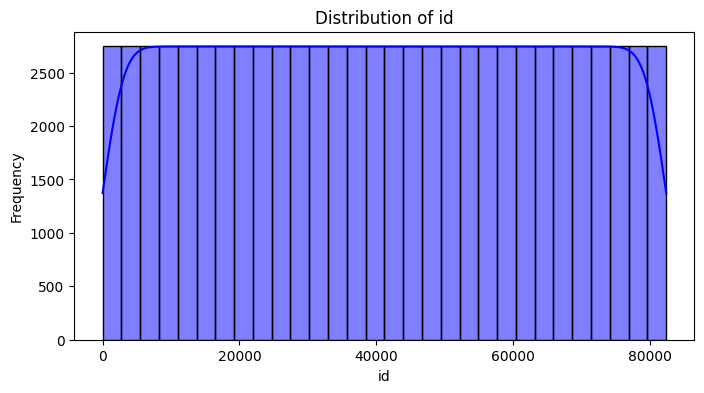

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


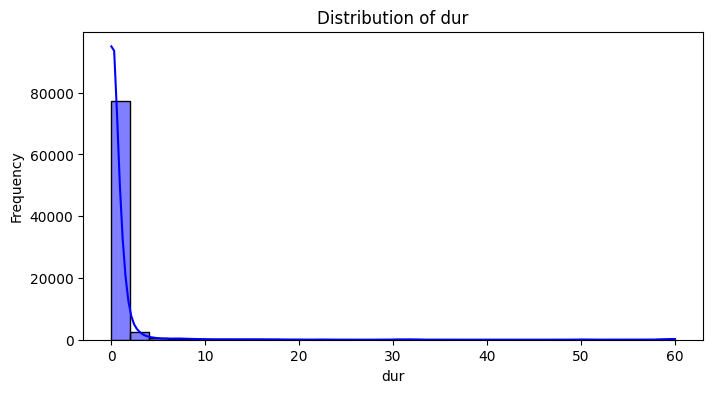

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


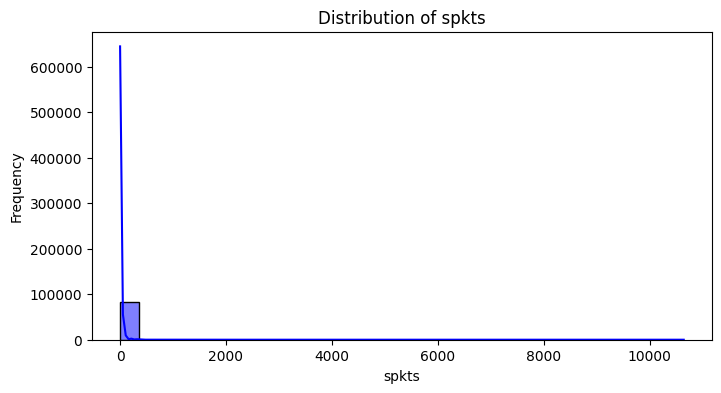

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


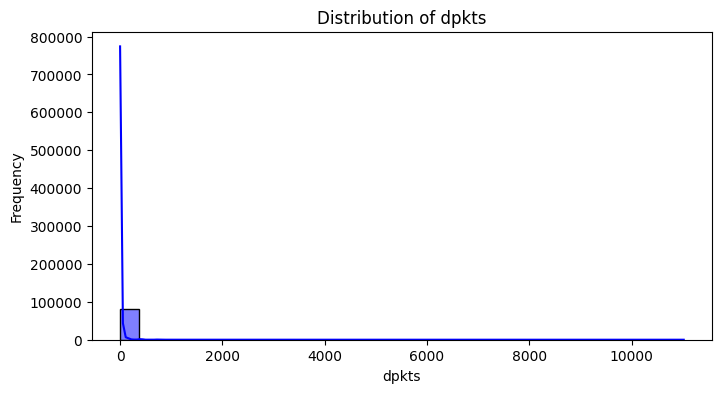

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


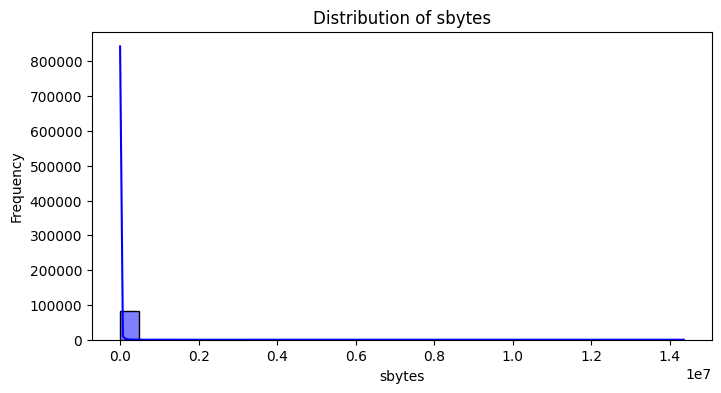

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


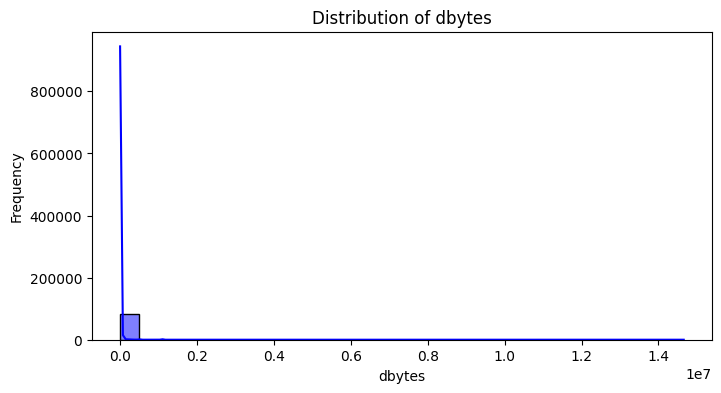

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


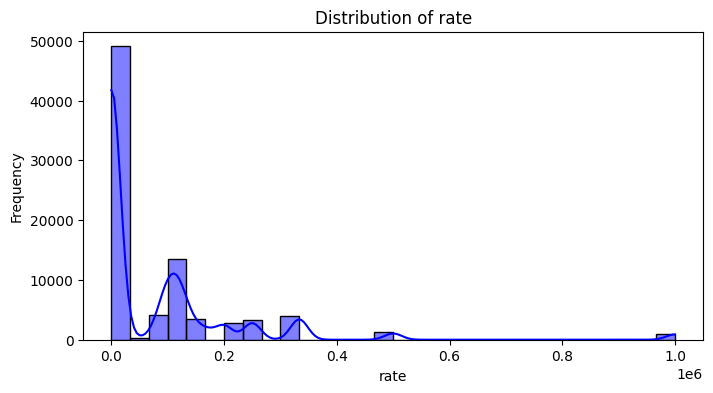

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


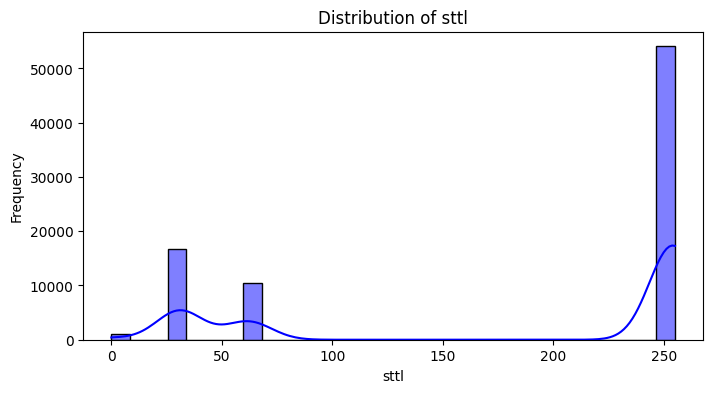

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


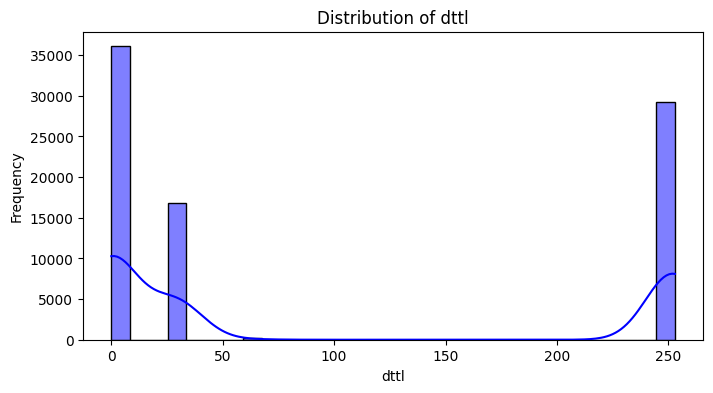

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


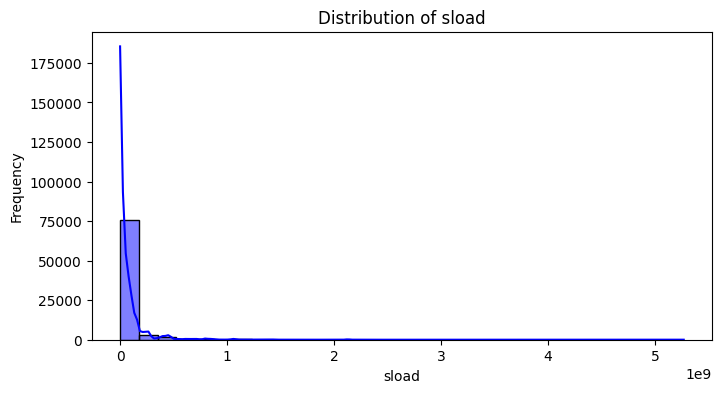

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


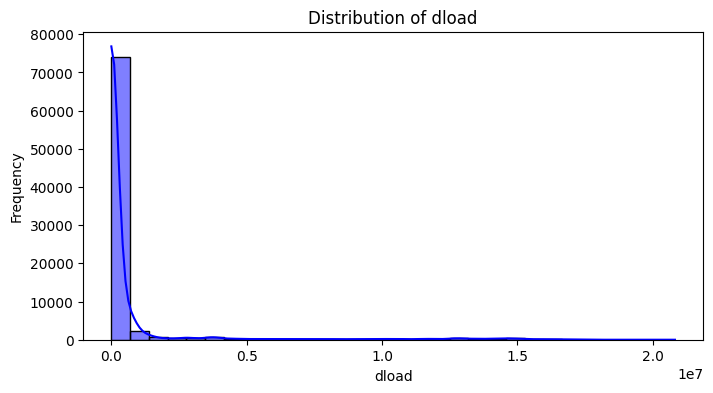

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


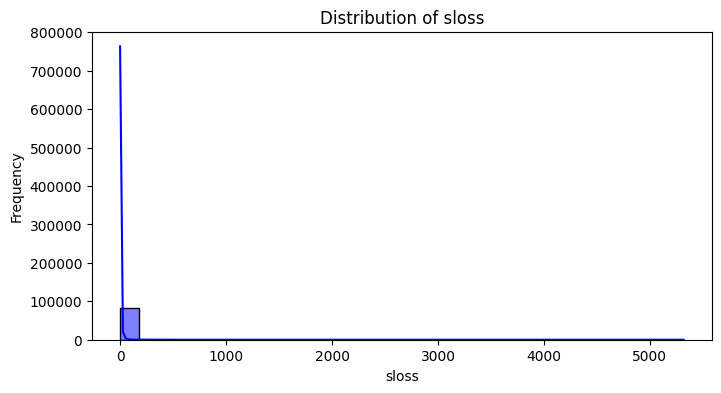

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


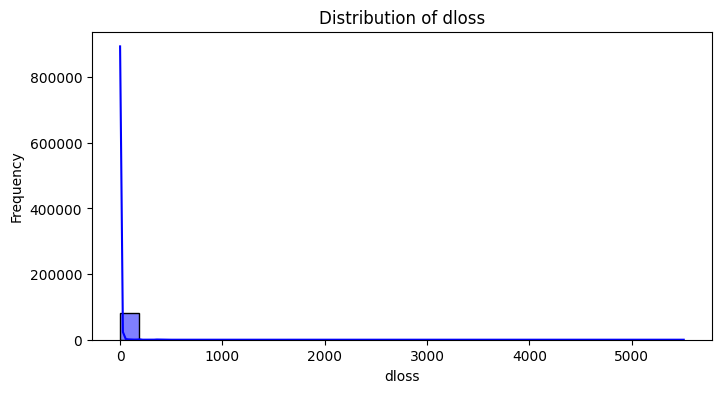

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


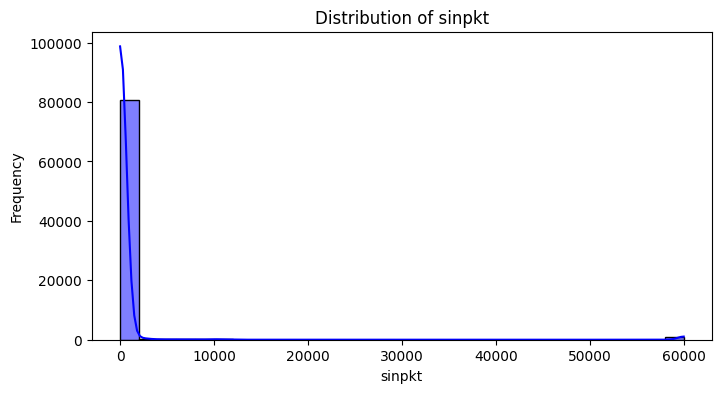

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


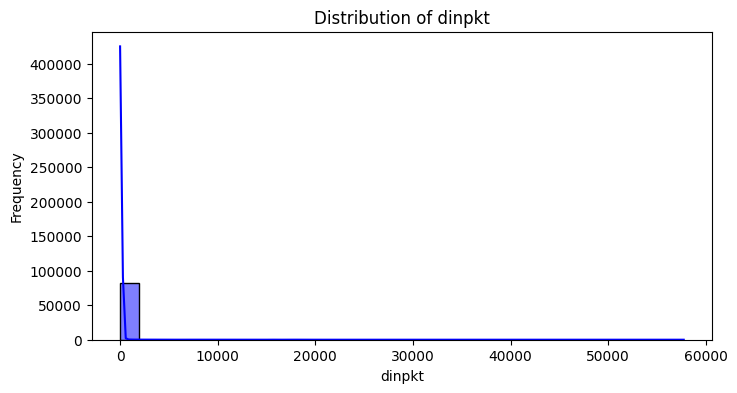

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


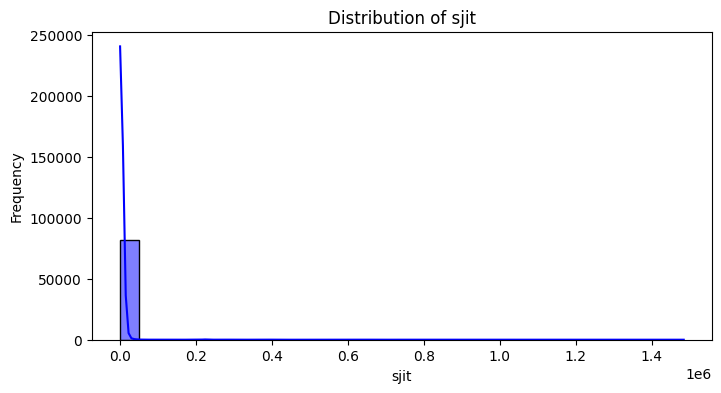

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


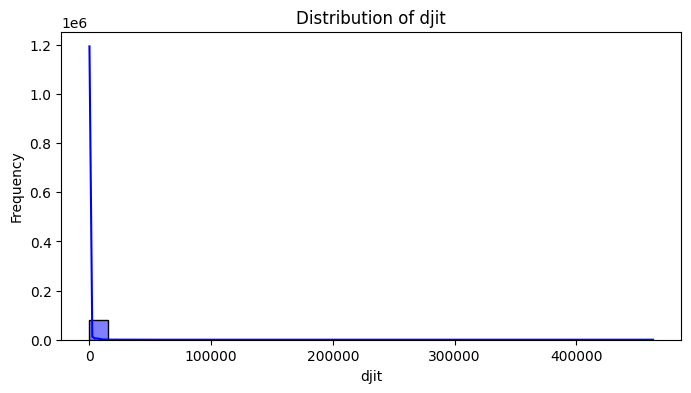

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


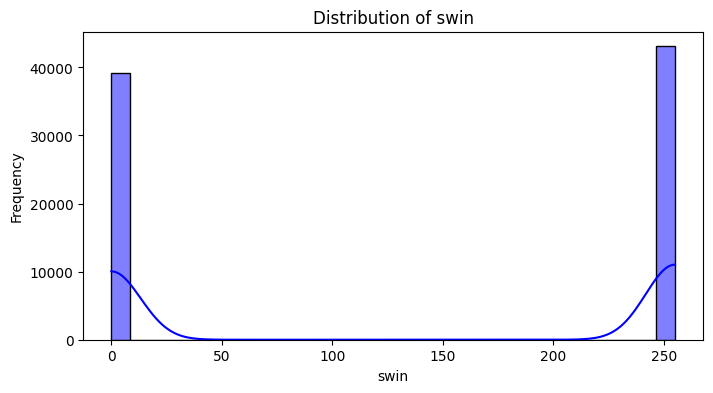

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


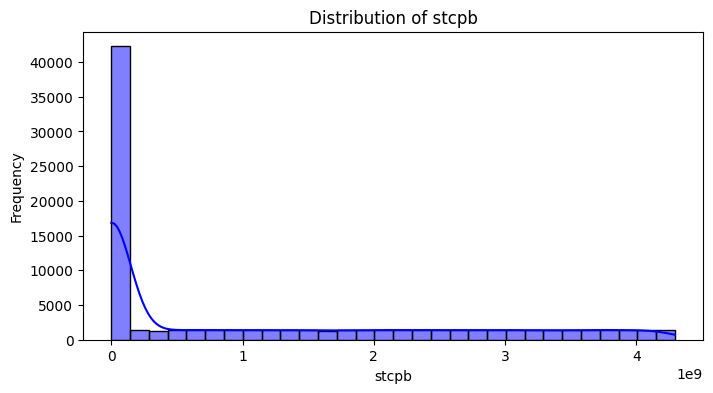

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


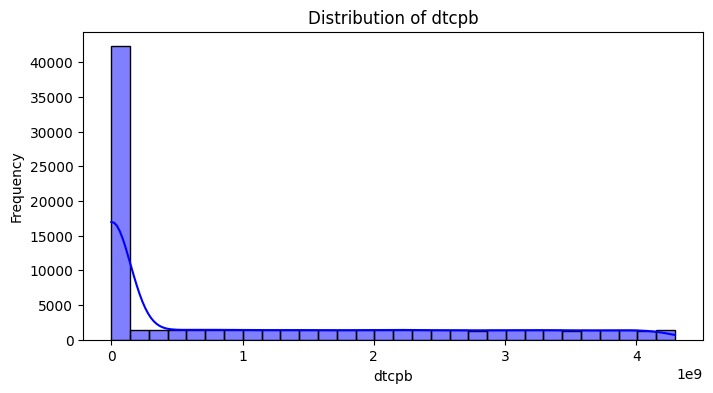

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


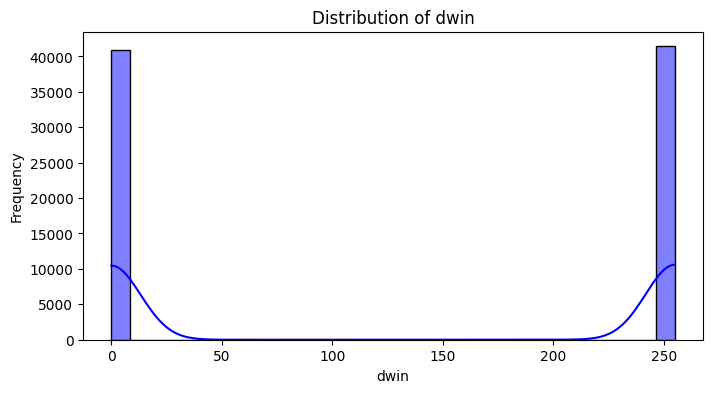

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


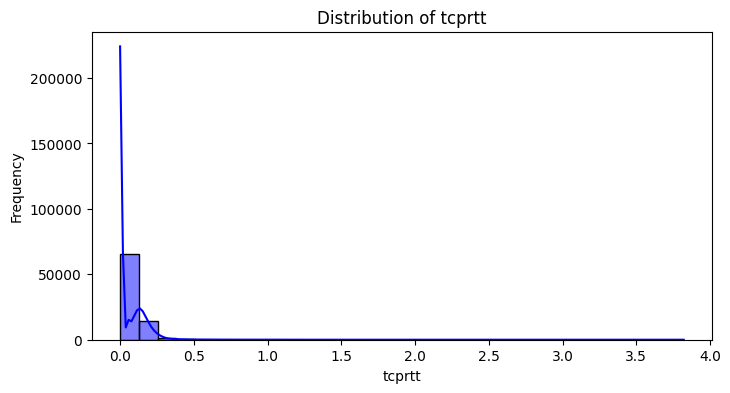

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


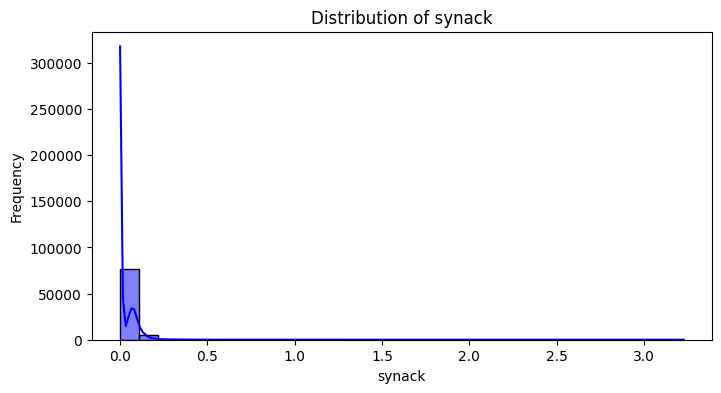

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


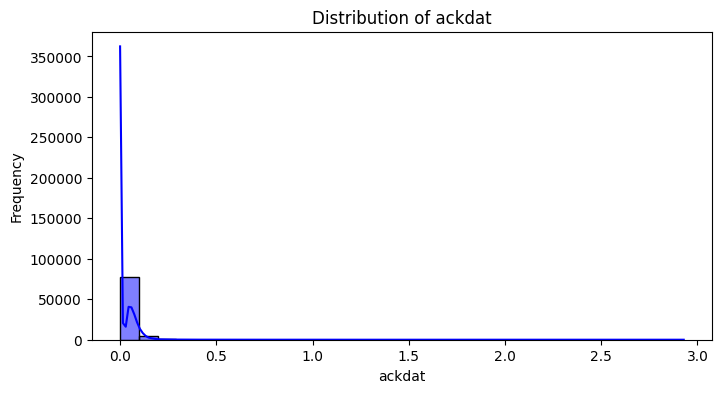

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


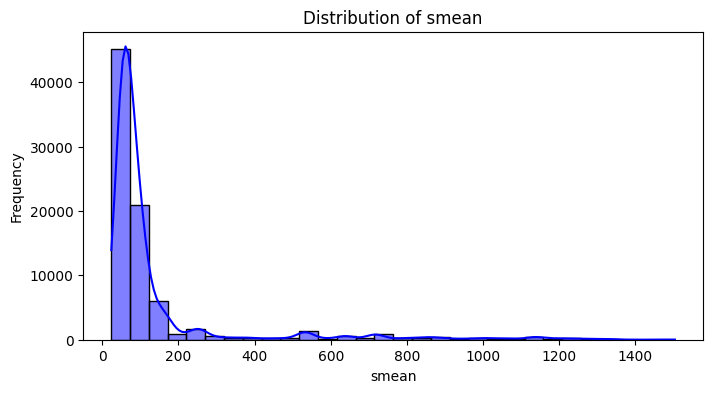

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


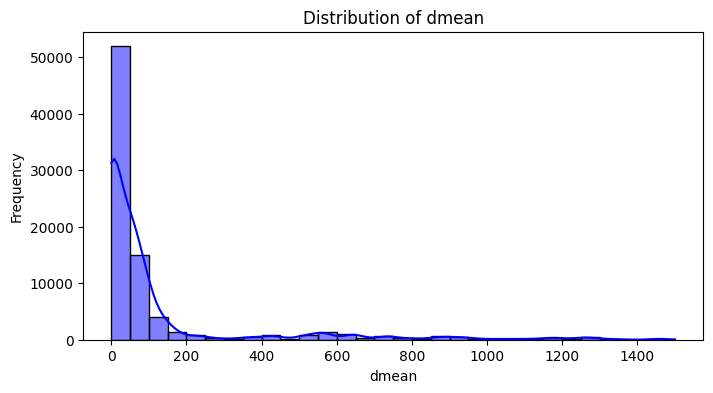

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


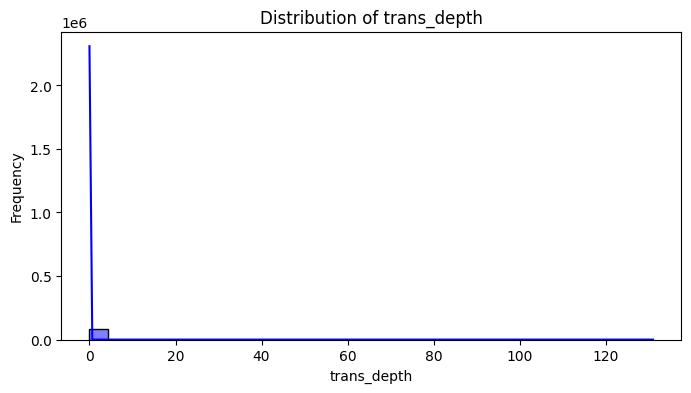

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


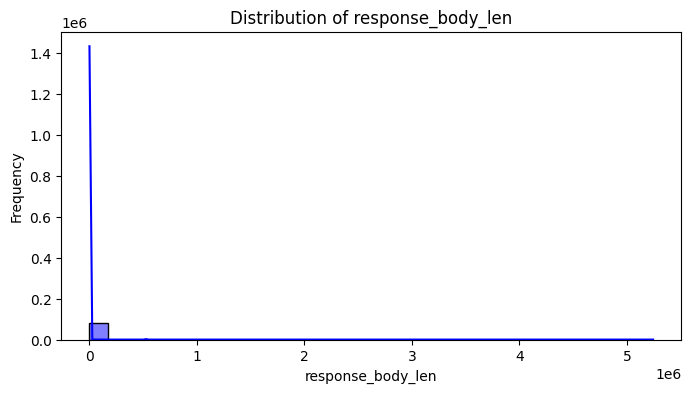

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


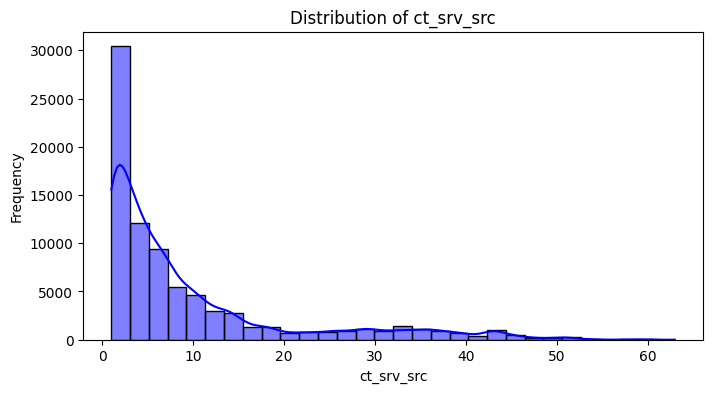

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


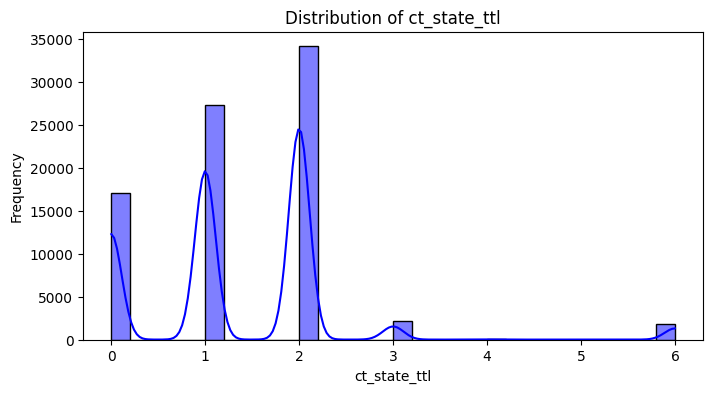

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


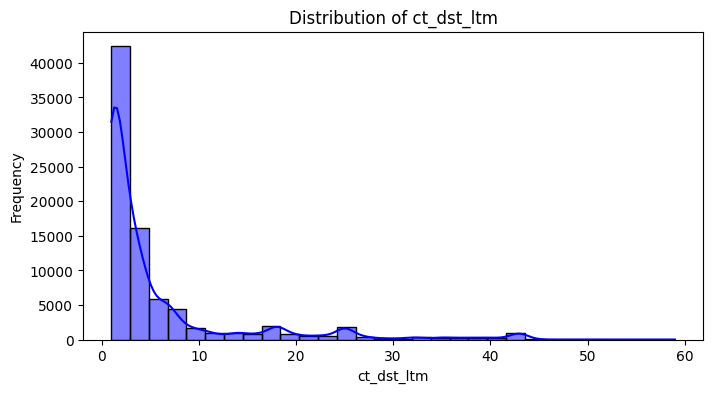

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


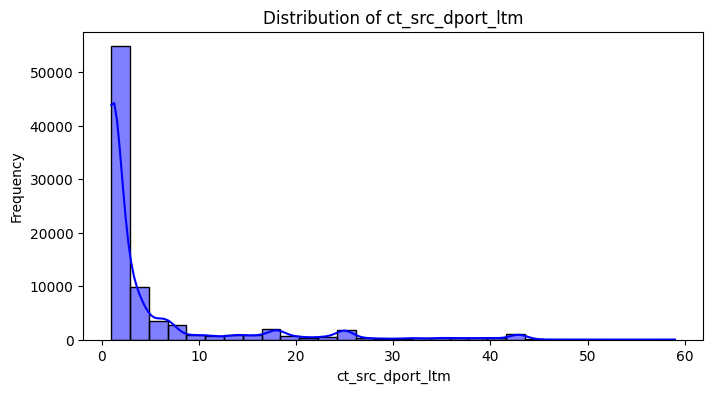

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


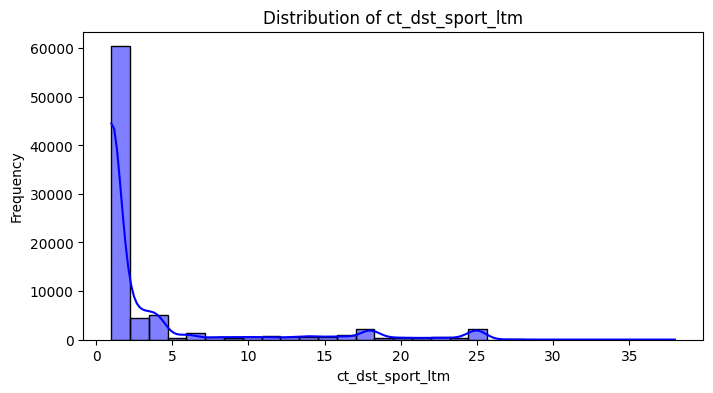

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


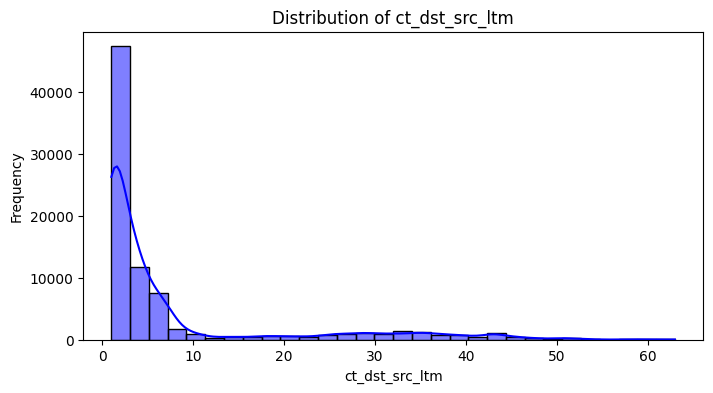

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


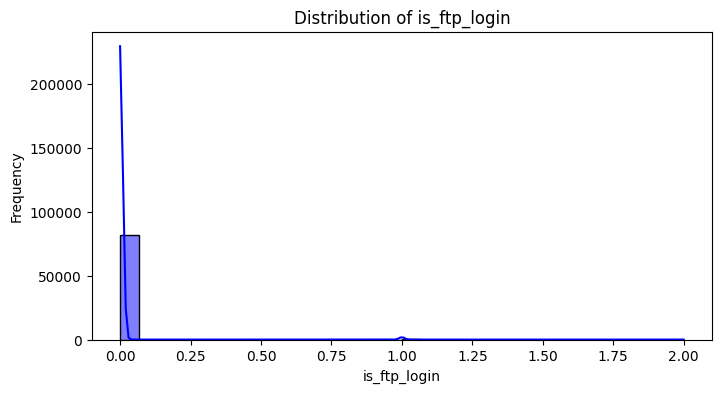

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


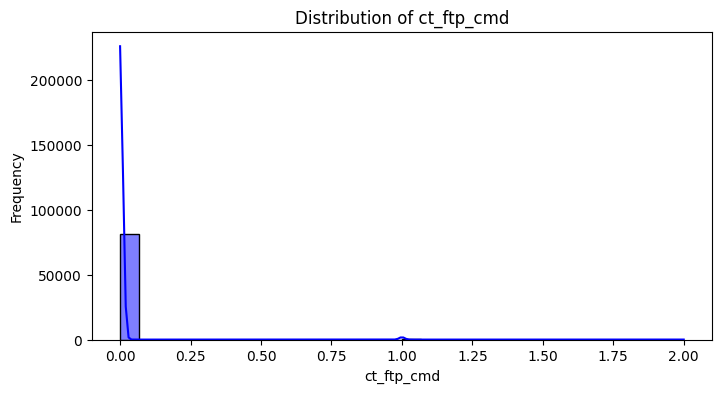

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


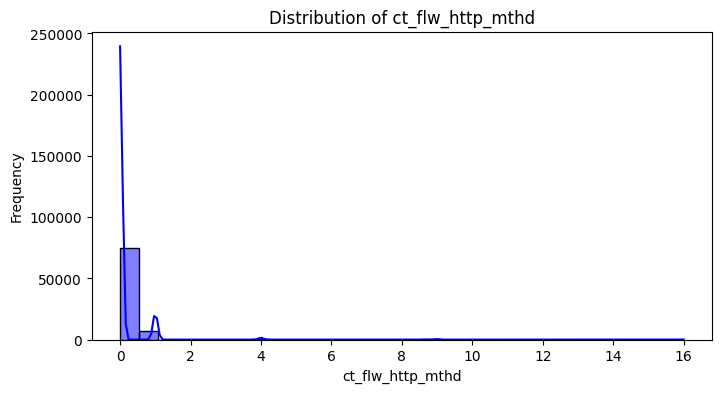

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


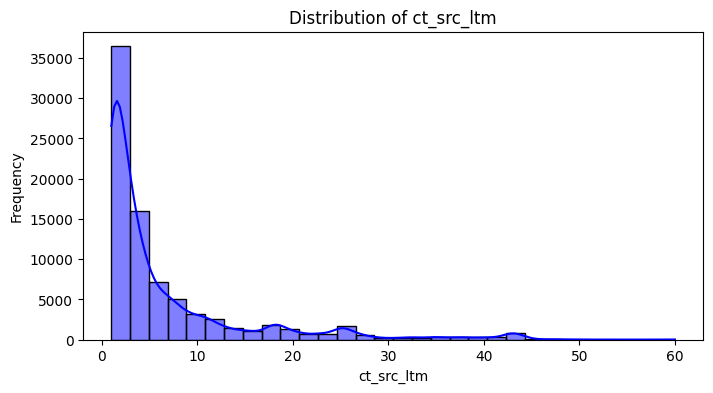

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


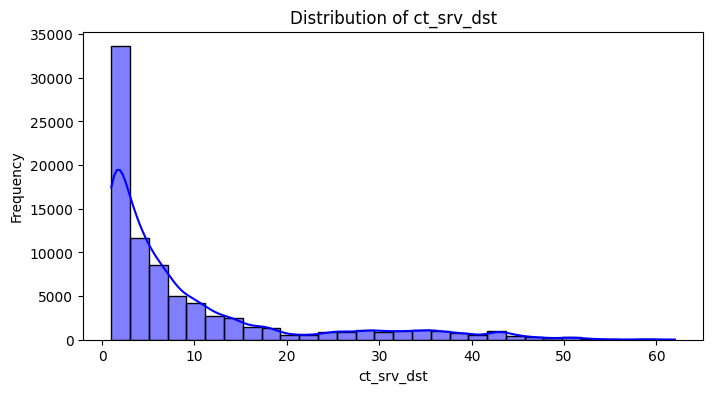

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


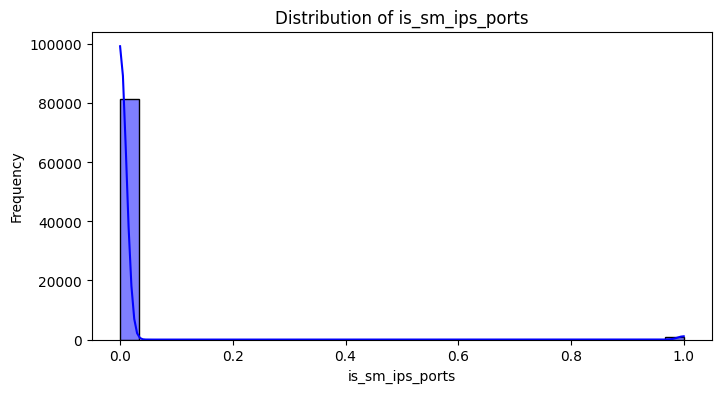

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


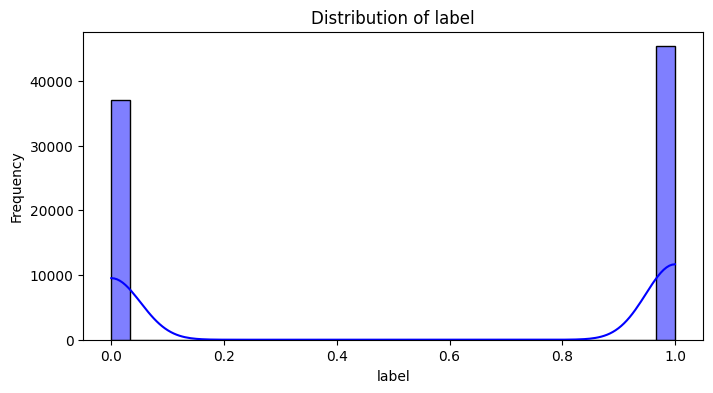

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plot distributions
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_df[col], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### Categorical Features

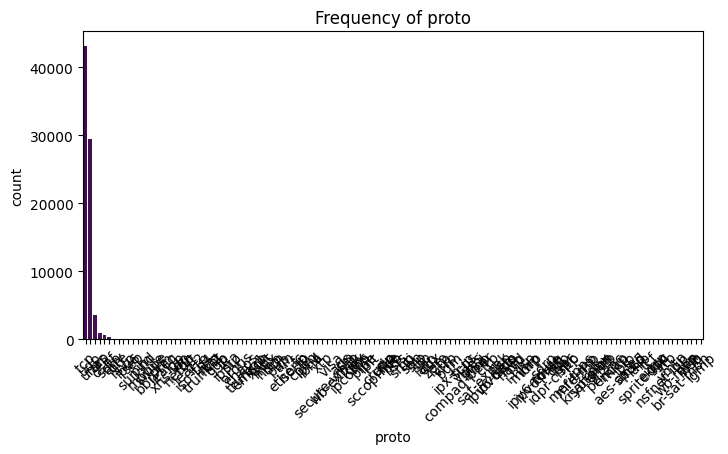

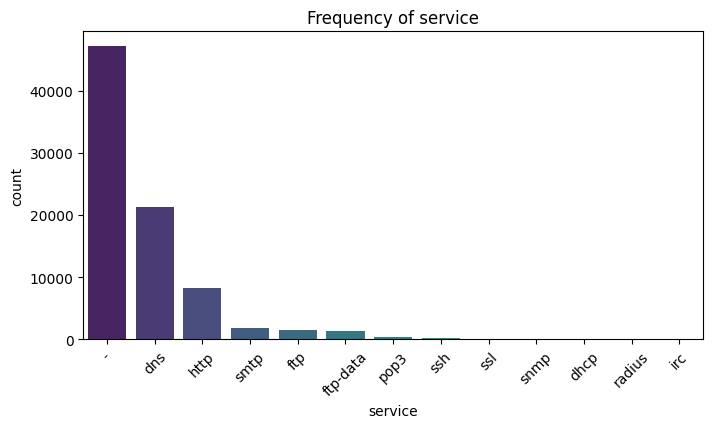

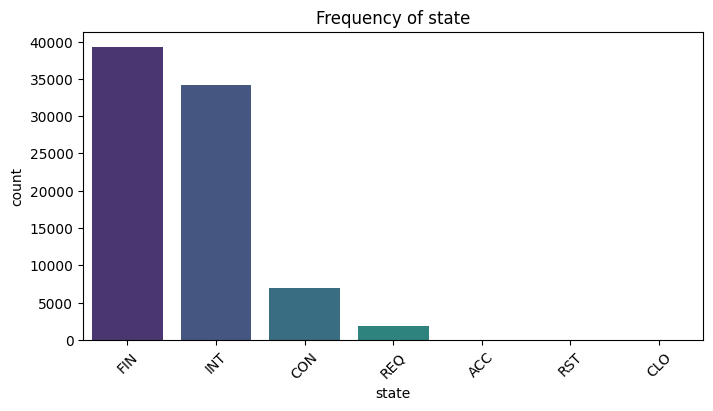

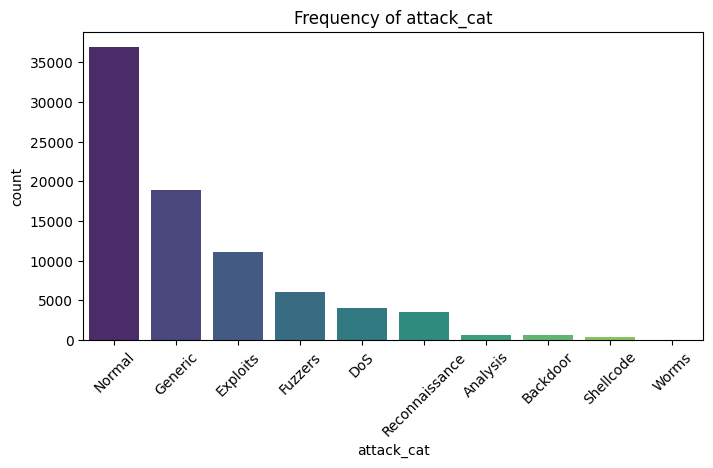

In [12]:
# Plot frequencies
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=train_df, x=col, palette='viridis', order=train_df[col].value_counts().index)
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45)
    plt.show()


## Bivariate Analysis

### Numerical Features vs. Target


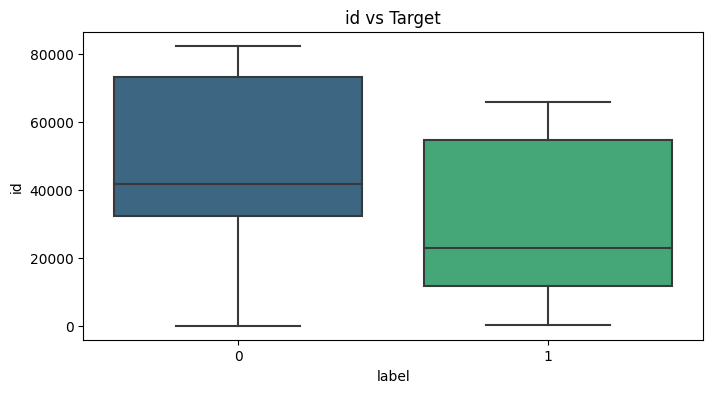

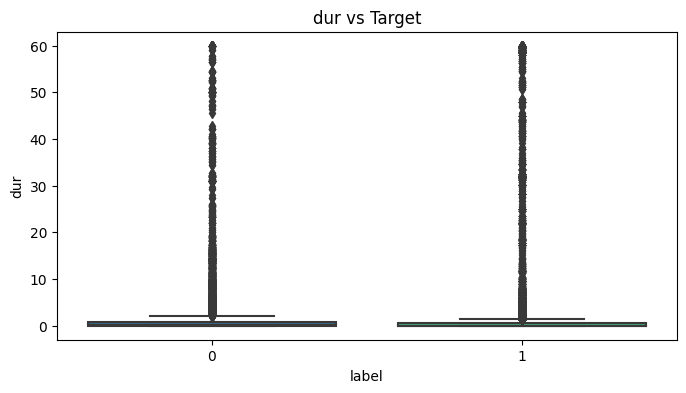

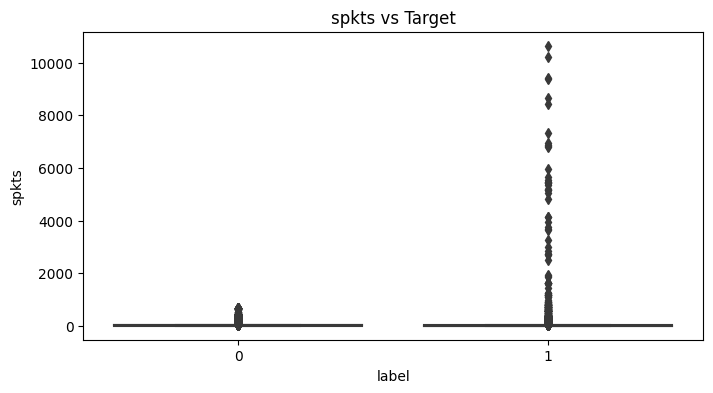

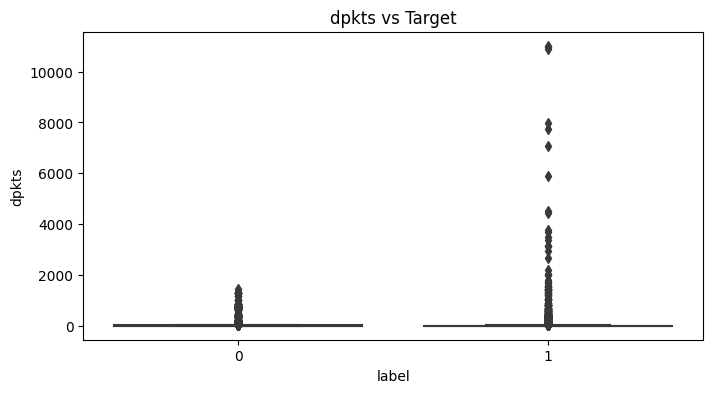

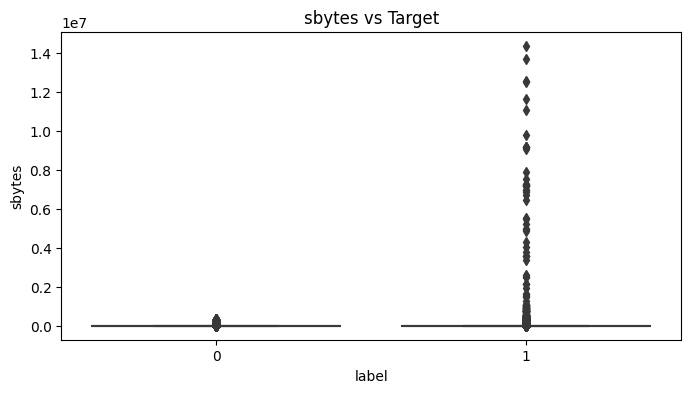

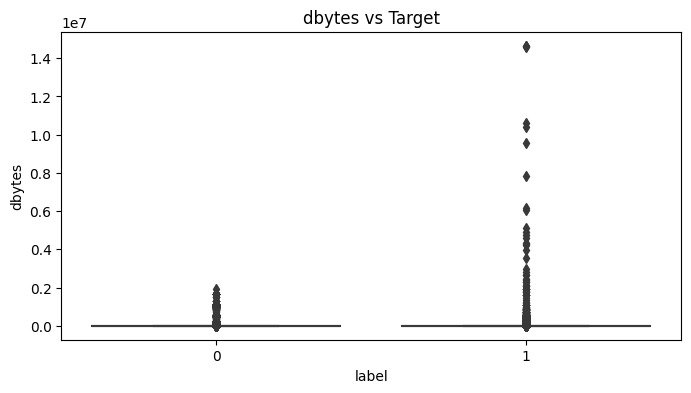

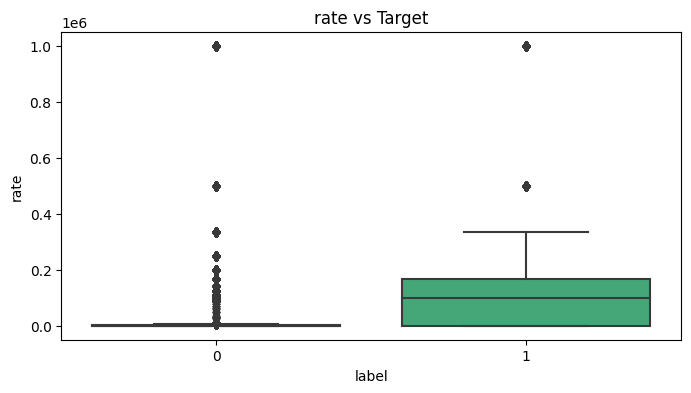

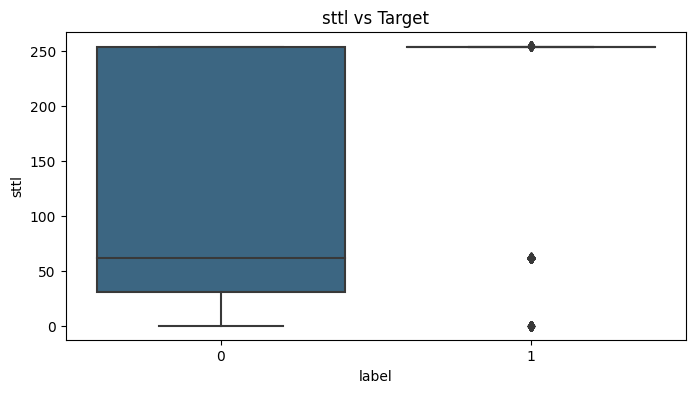

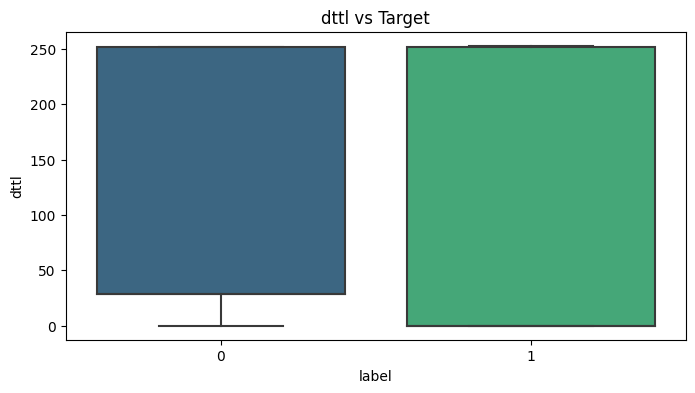

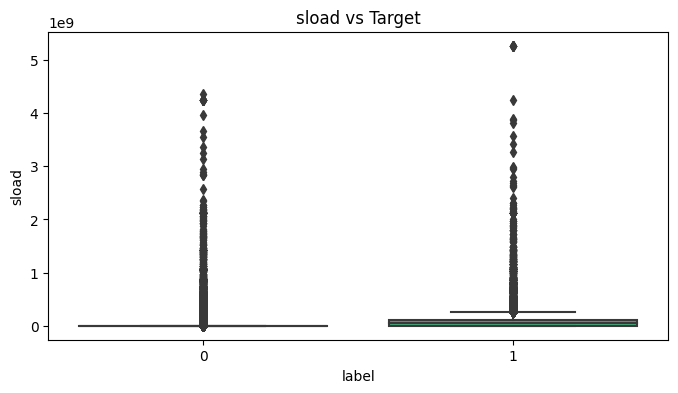

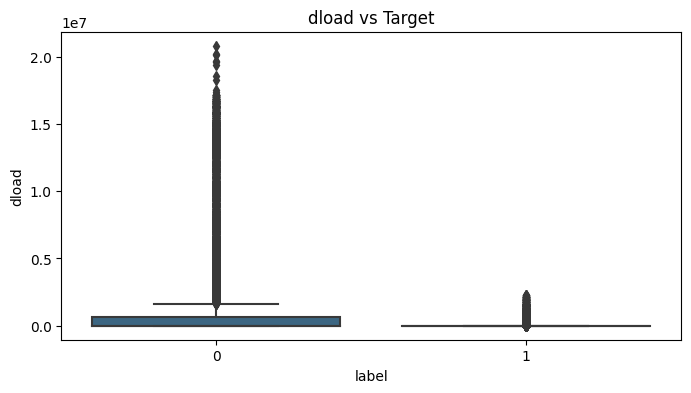

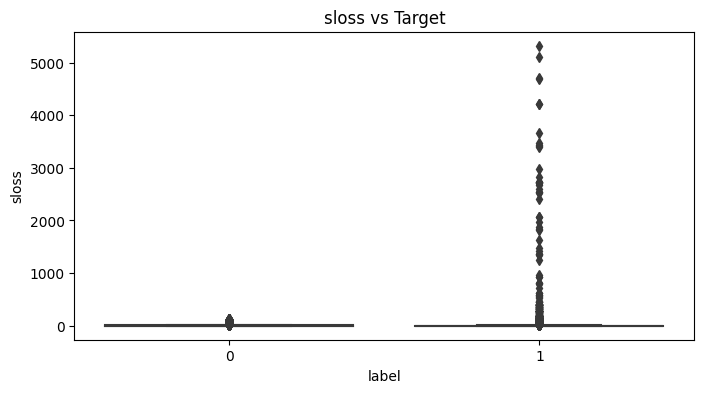

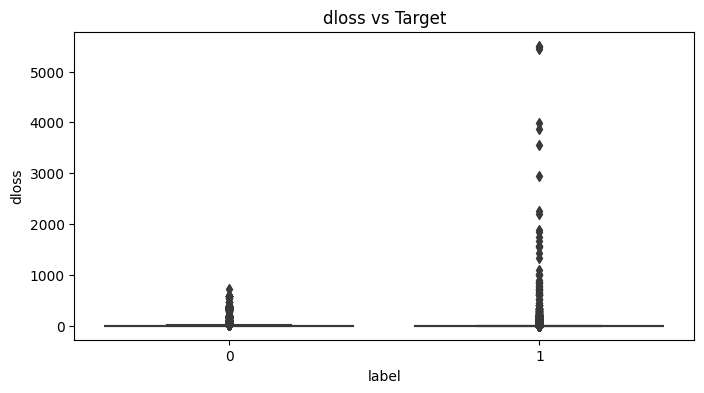

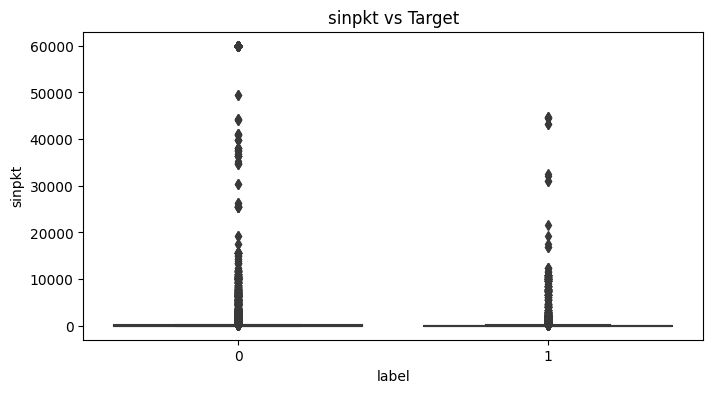

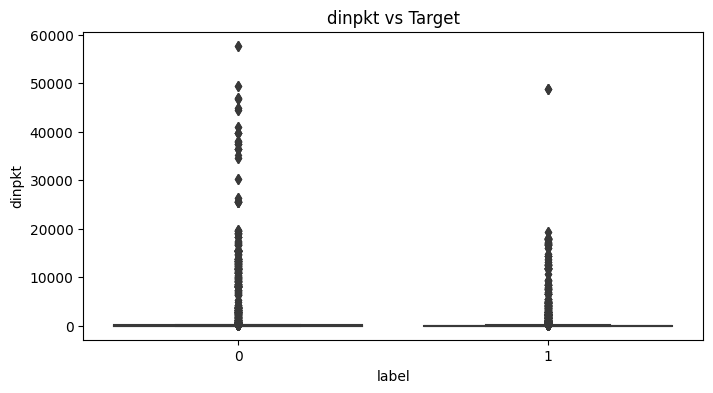

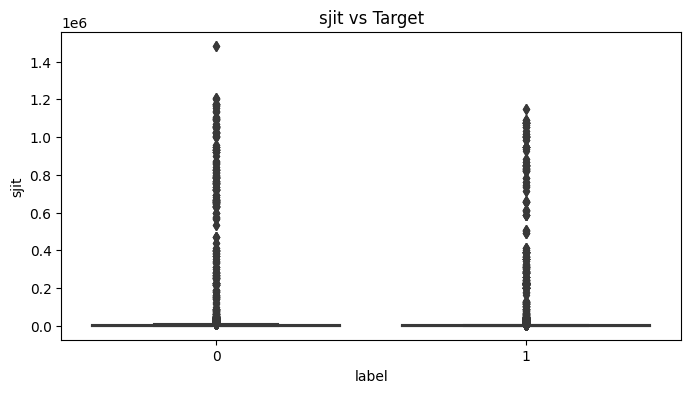

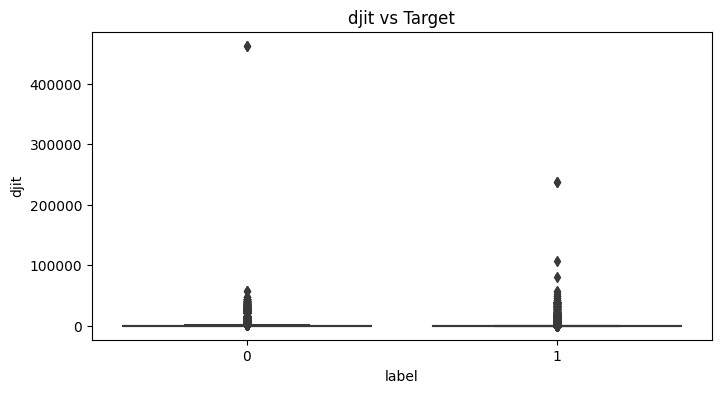

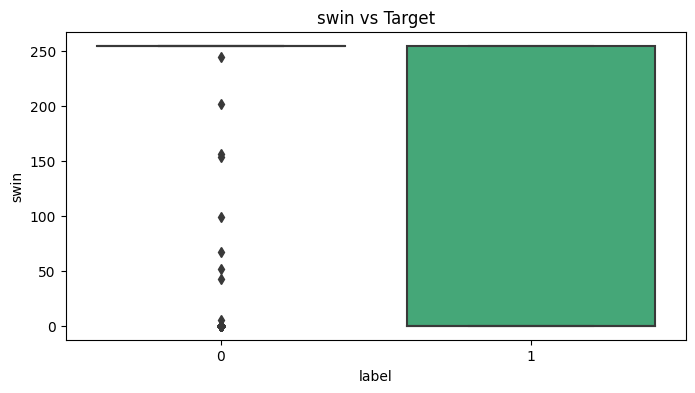

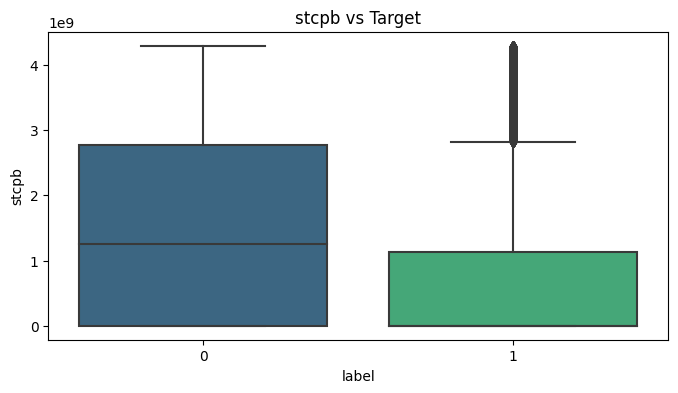

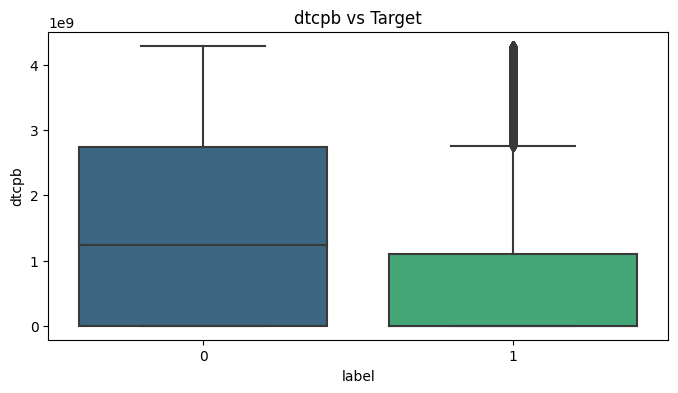

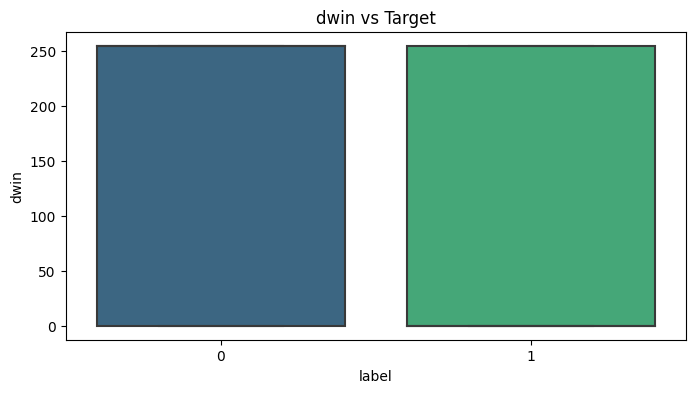

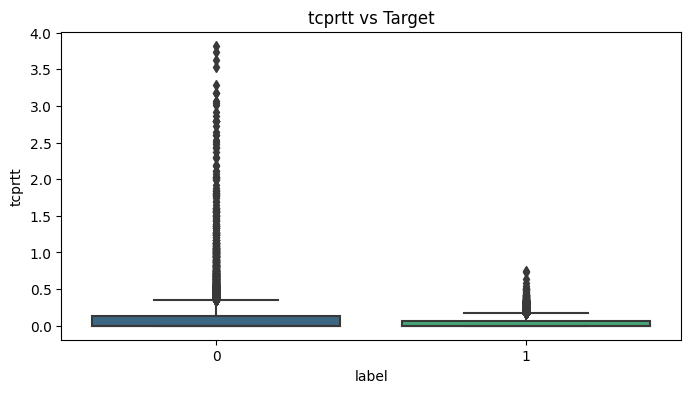

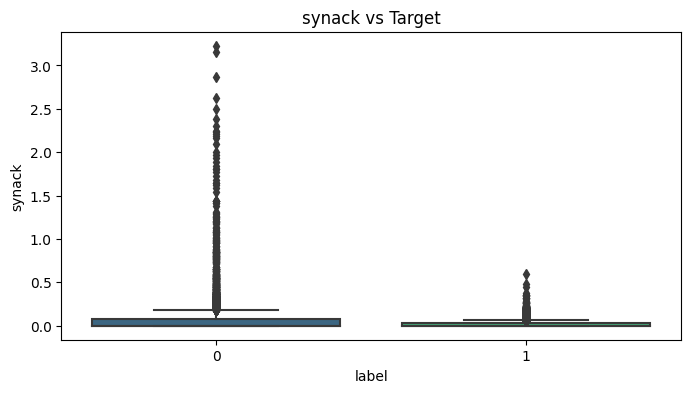

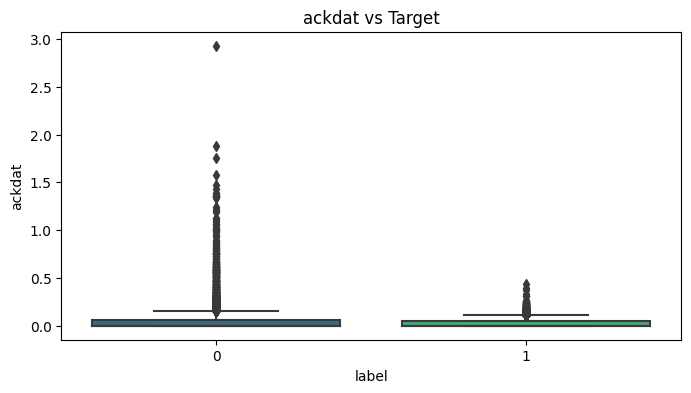

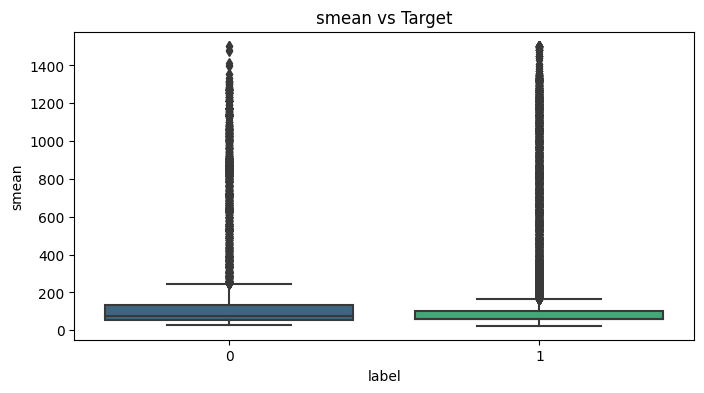

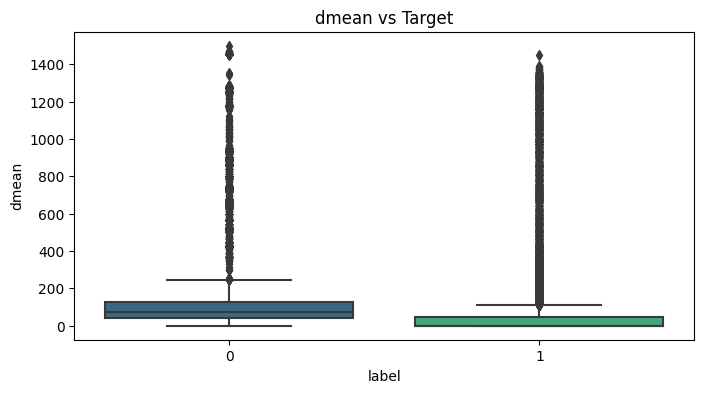

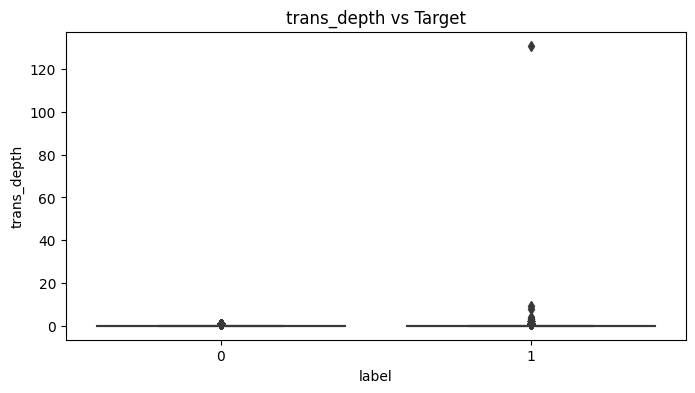

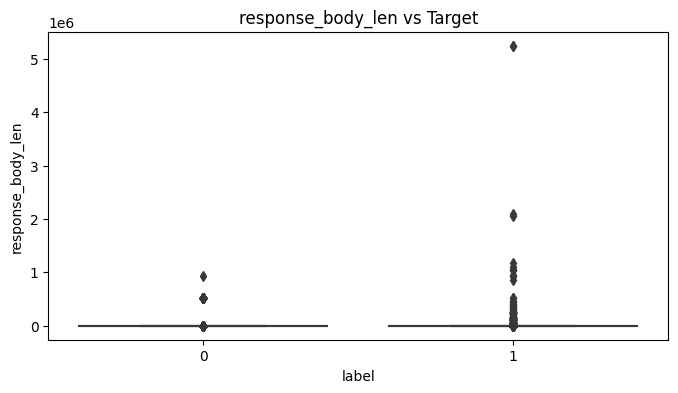

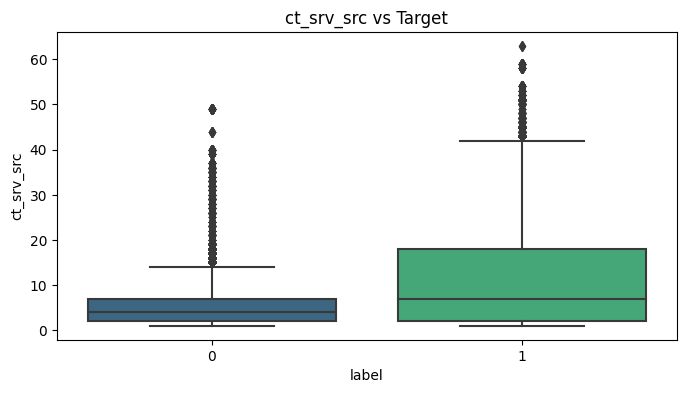

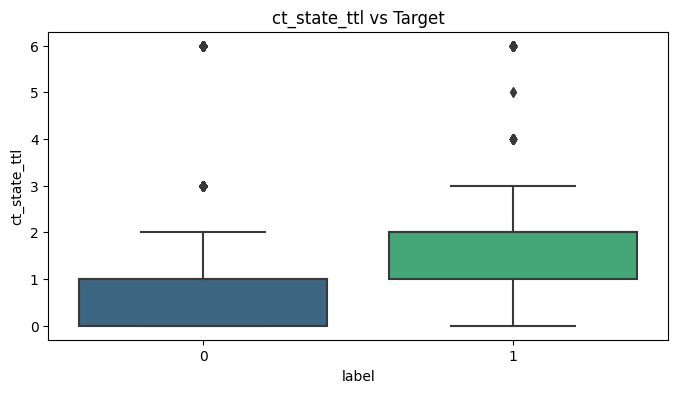

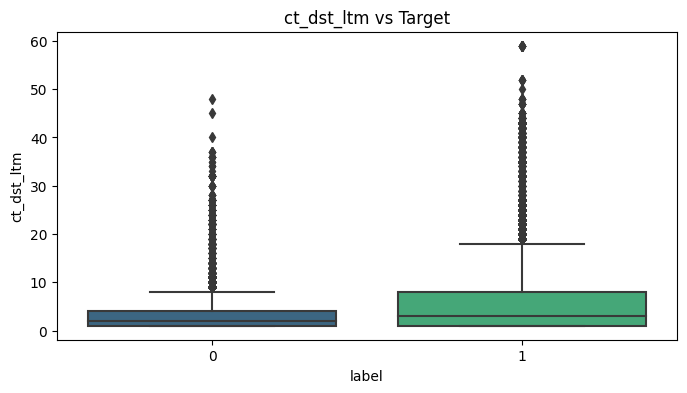

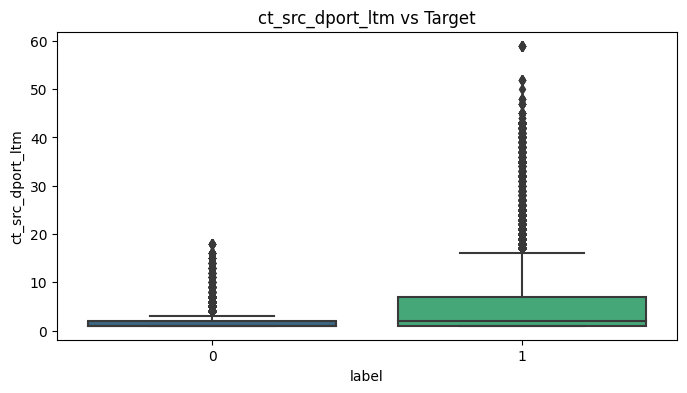

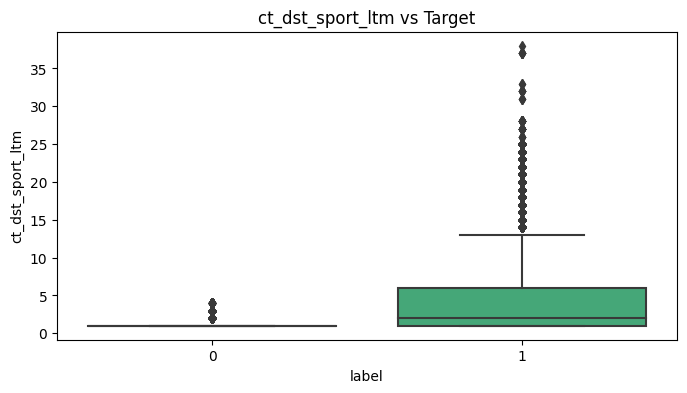

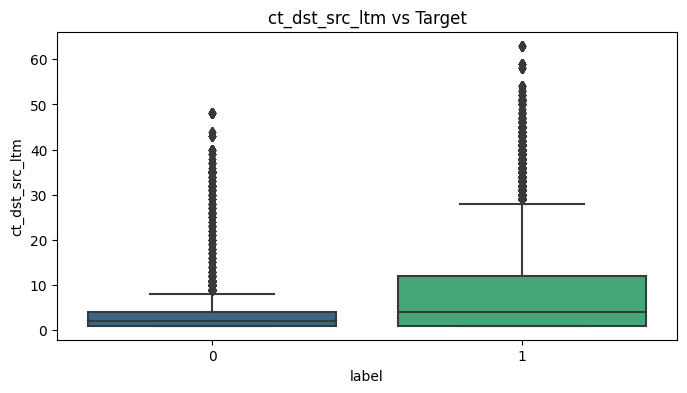

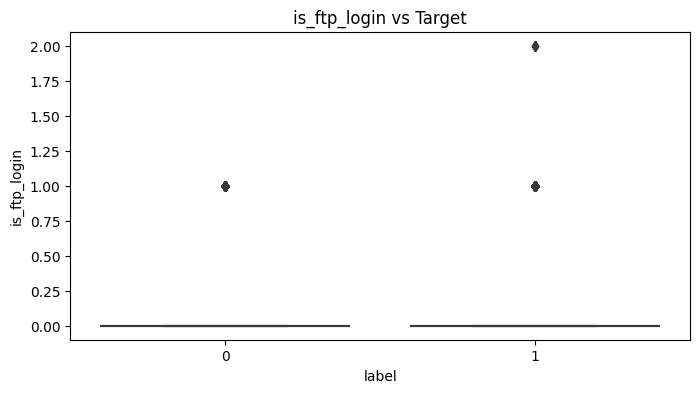

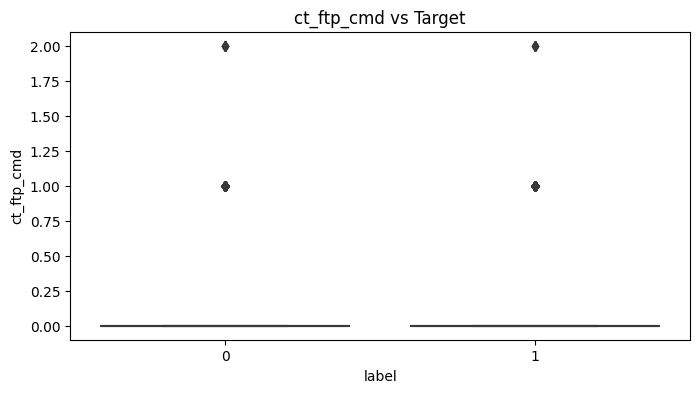

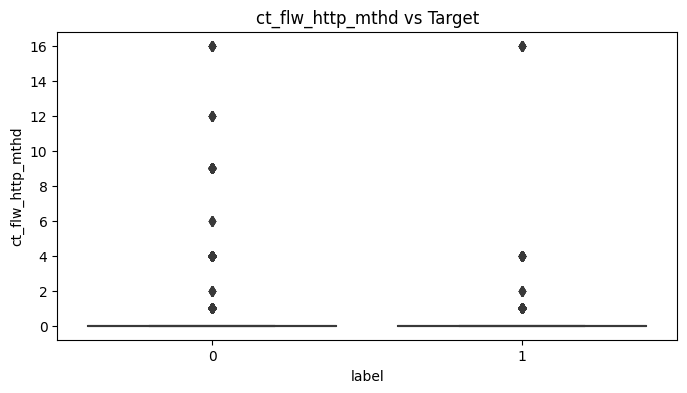

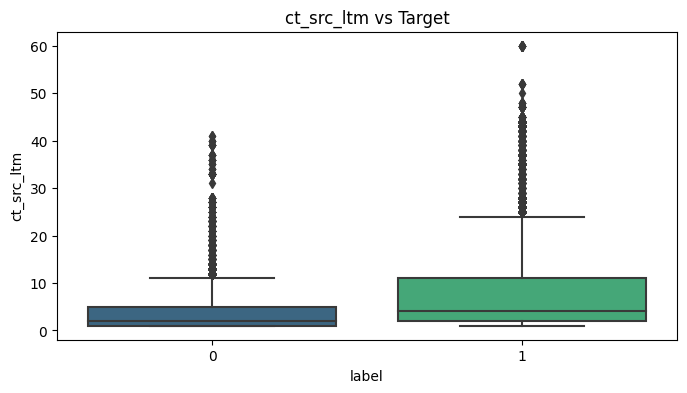

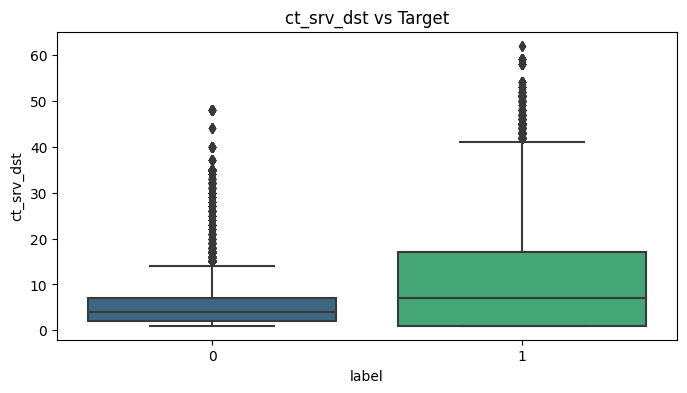

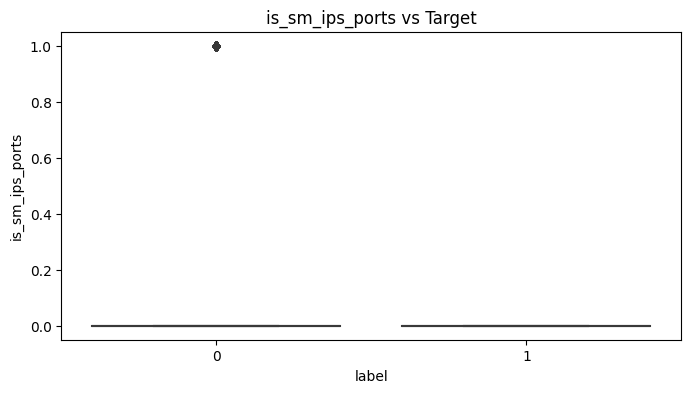

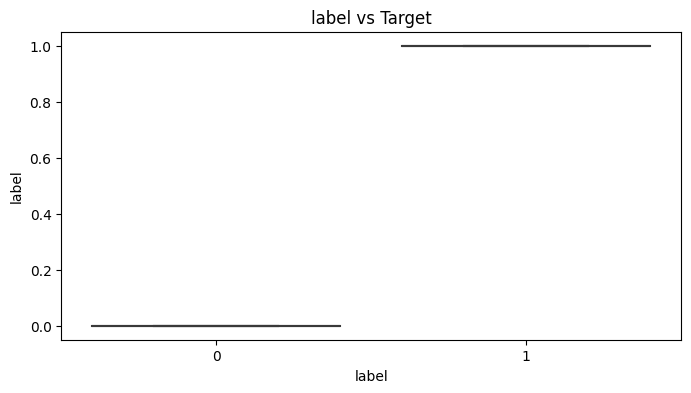

In [13]:
# Plot numerical features against the target variable
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=train_df, x='label', y=col, palette='viridis')
    plt.title(f'{col} vs Target')
    plt.show()


### Categorical Features vs. Target


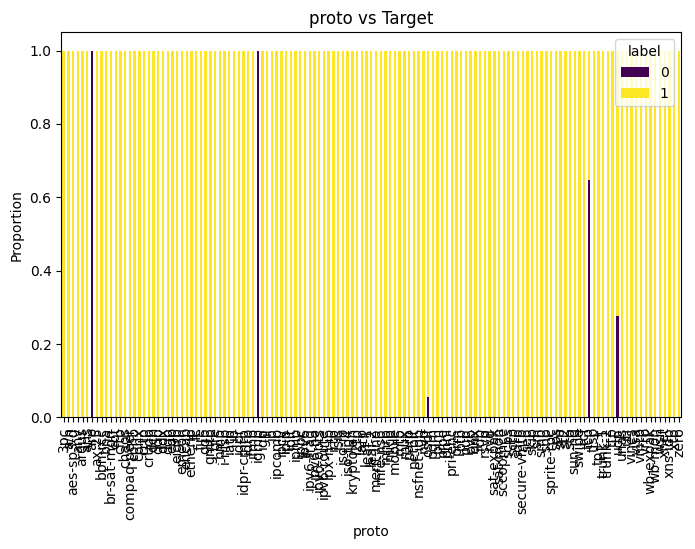

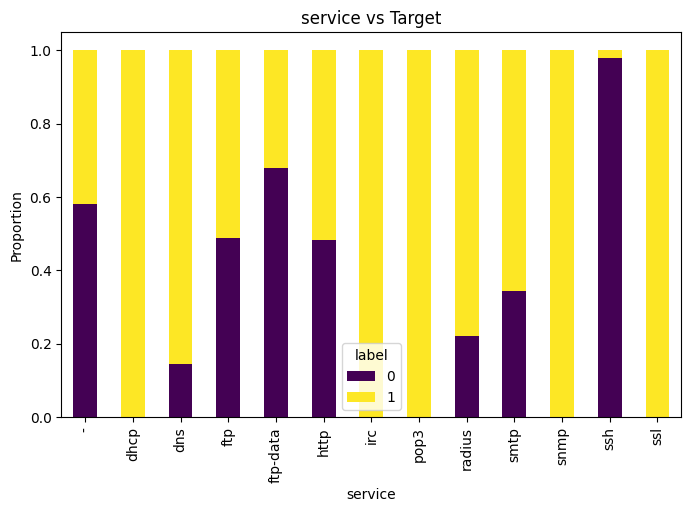

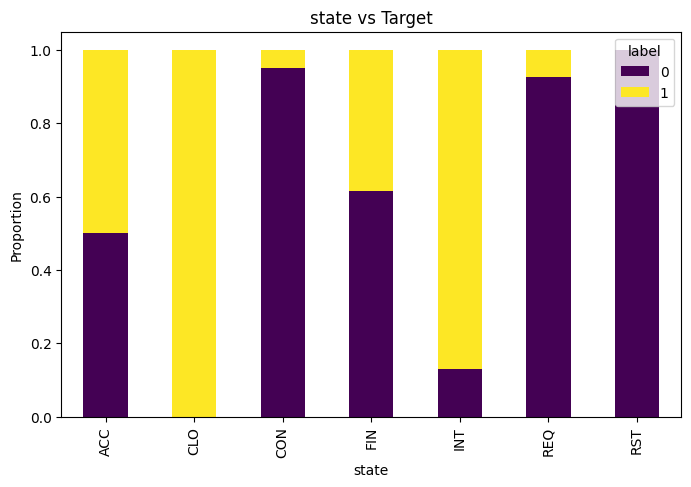

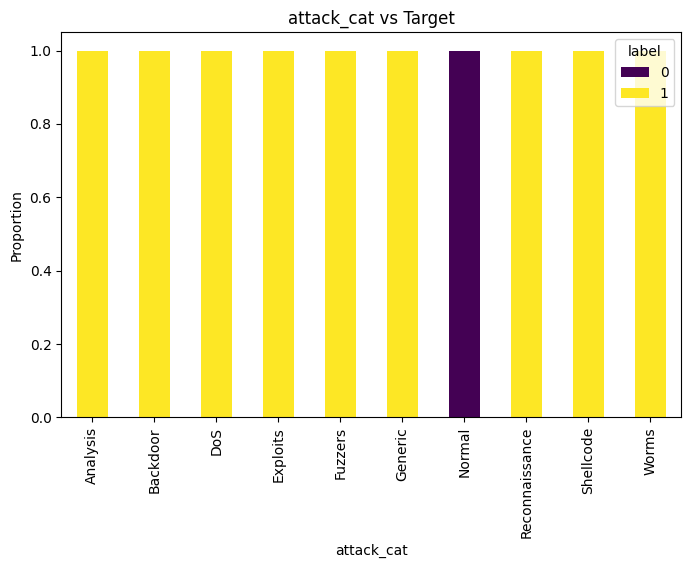

In [14]:
# Stacked bar plots for categorical features vs target
for col in categorical_columns:
    cross_tab = pd.crosstab(train_df[col], train_df['label'], normalize='index')
    cross_tab.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='viridis')
    plt.title(f'{col} vs Target')
    plt.ylabel('Proportion')
    plt.show()


## Outlier Detection

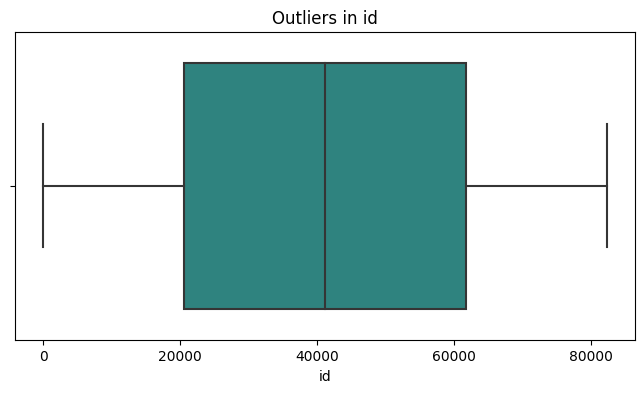

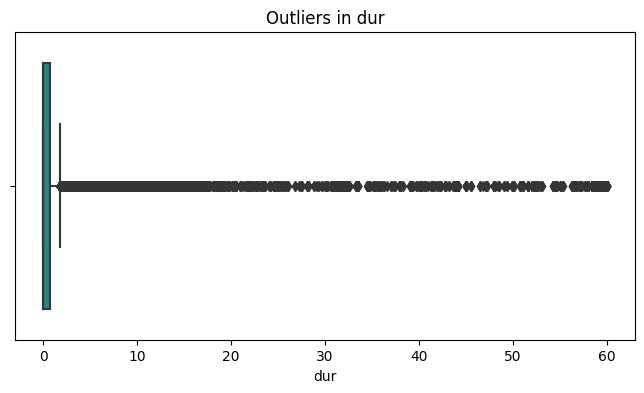

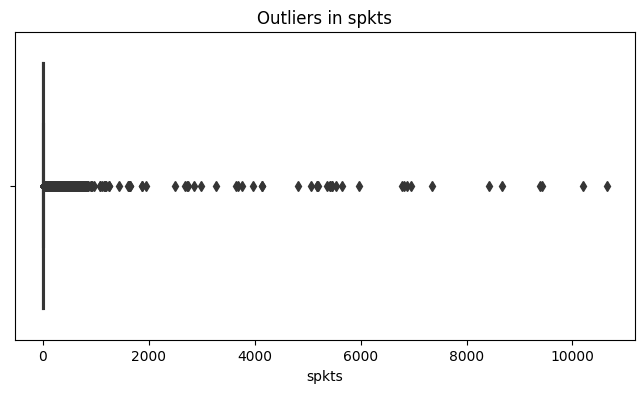

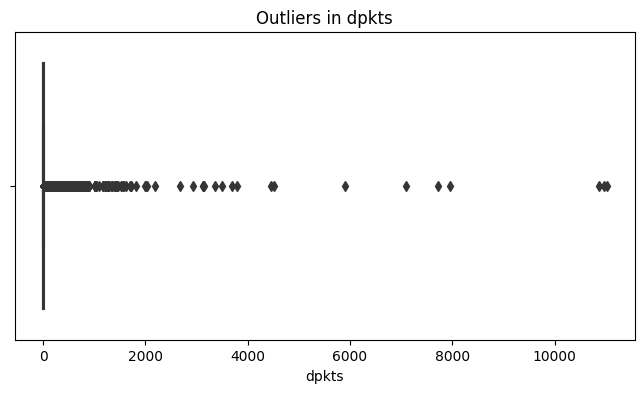

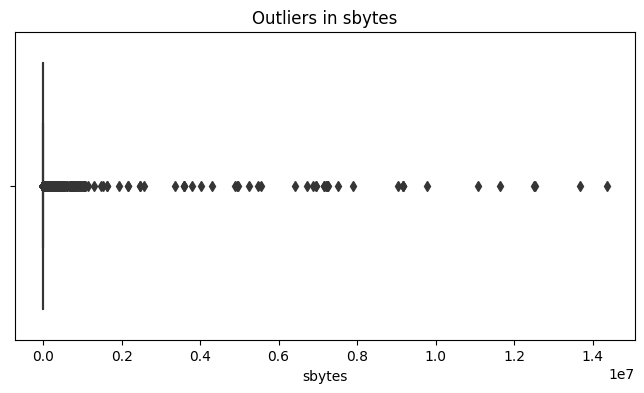

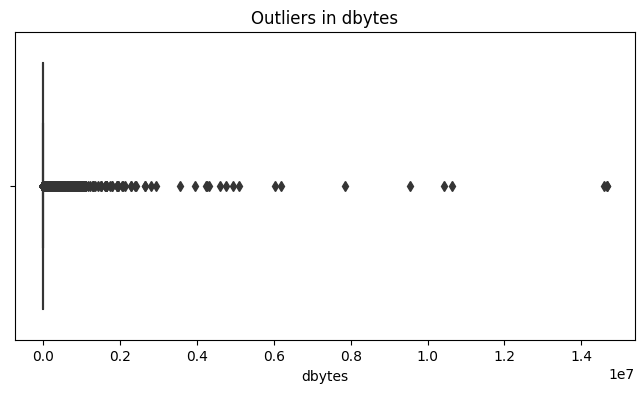

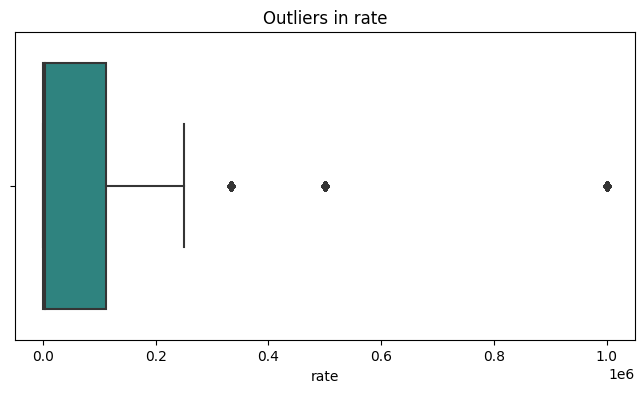

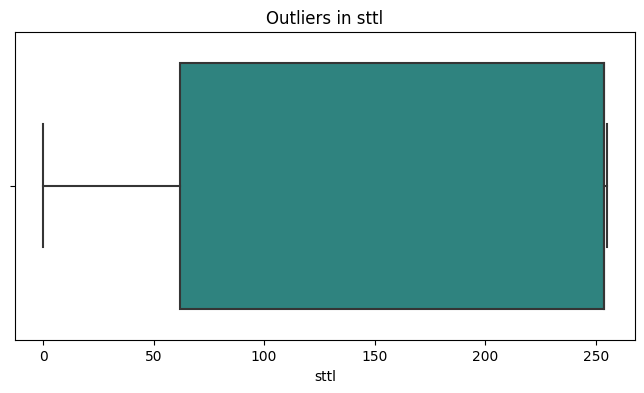

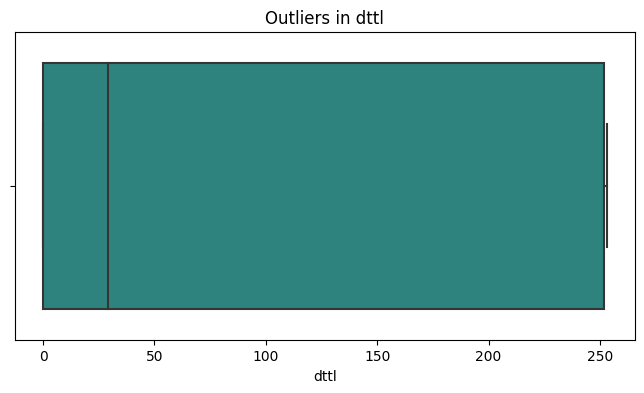

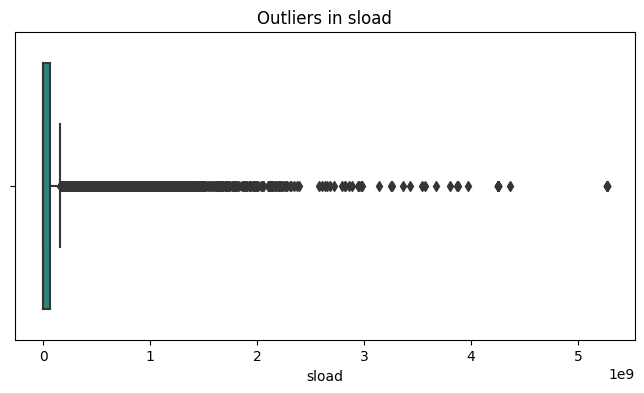

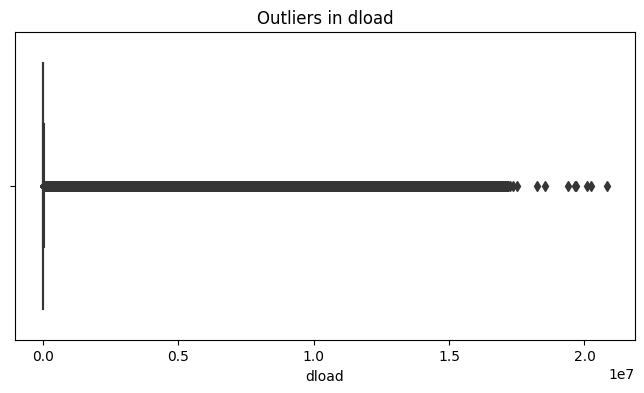

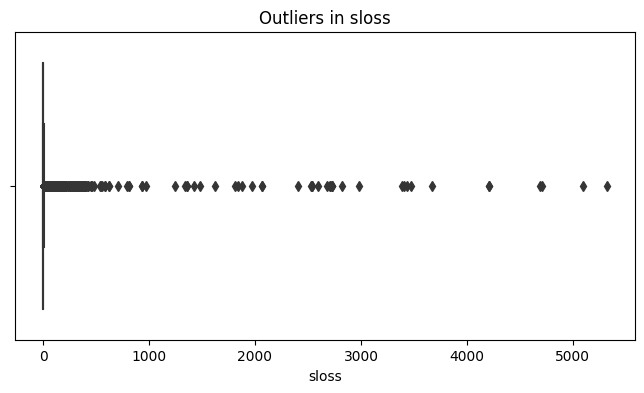

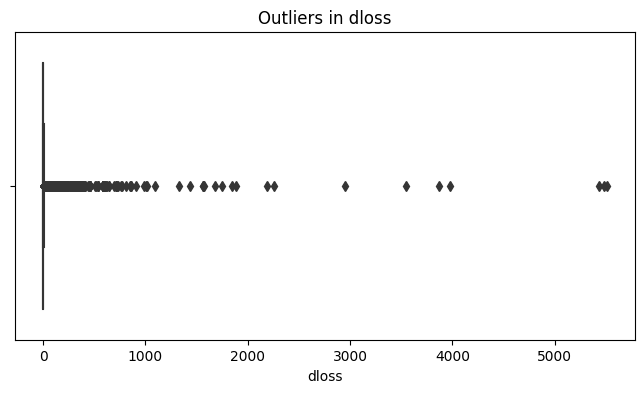

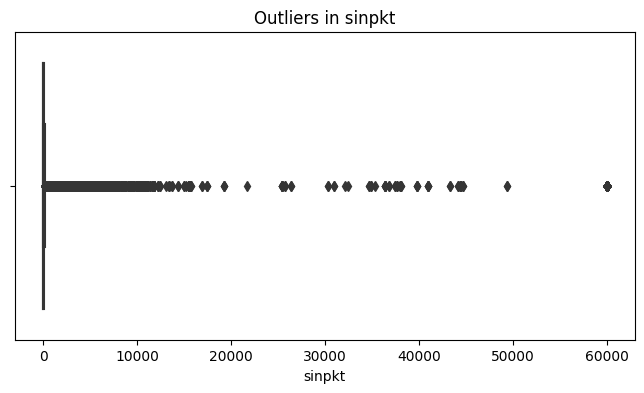

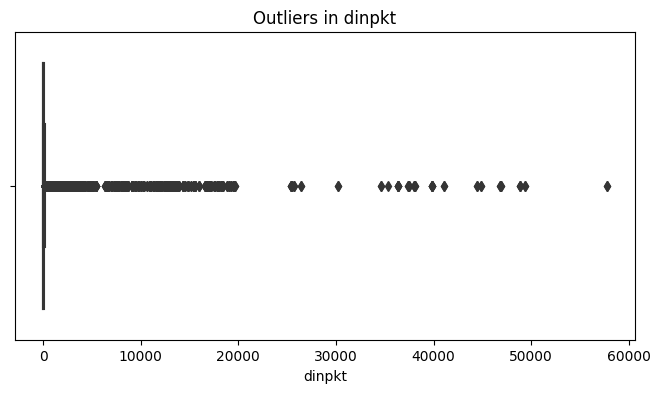

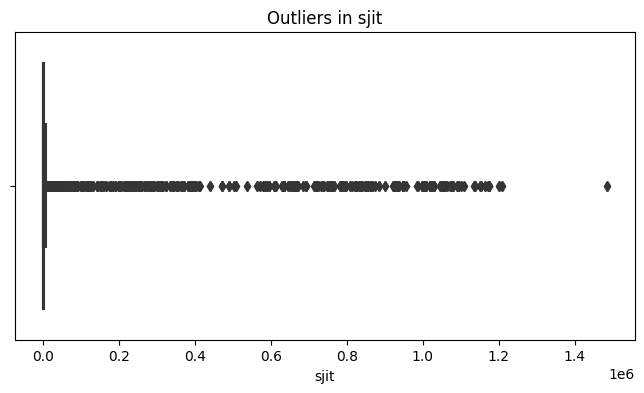

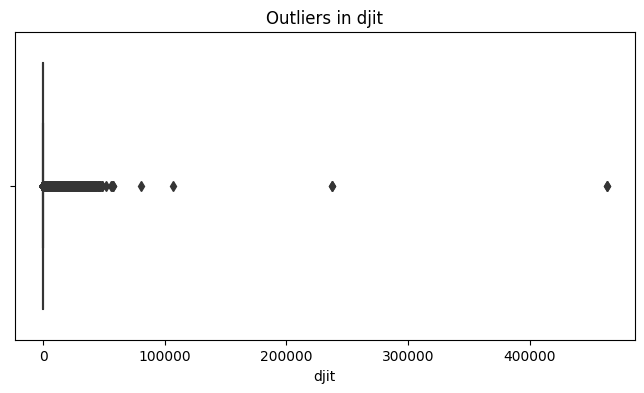

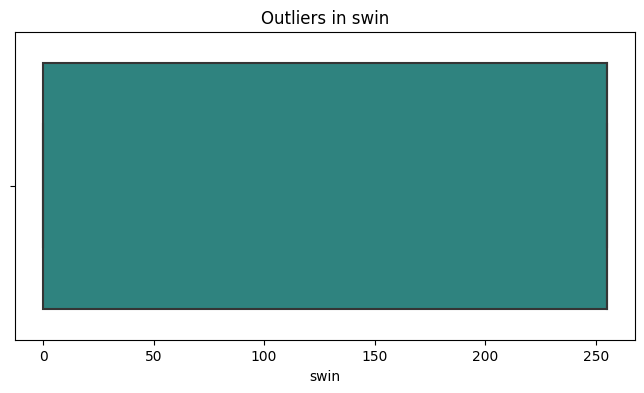

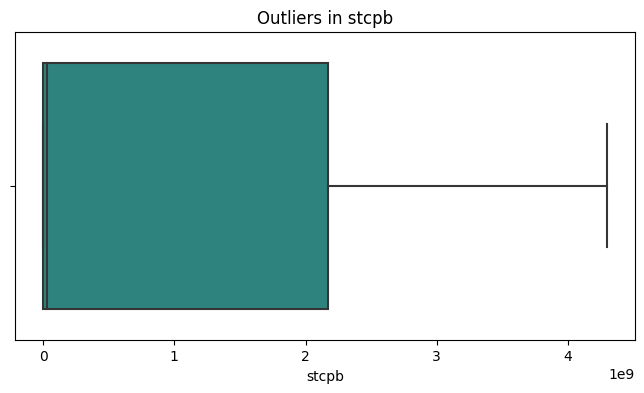

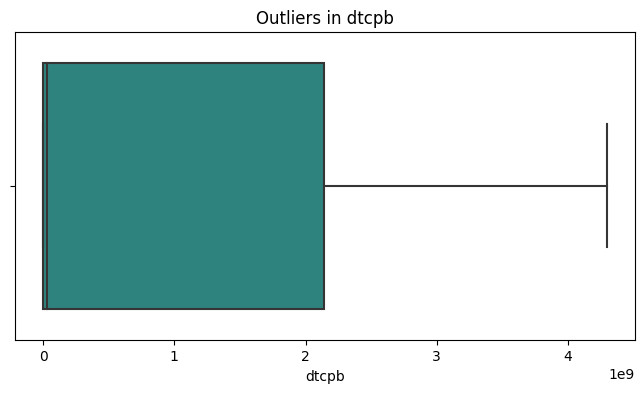

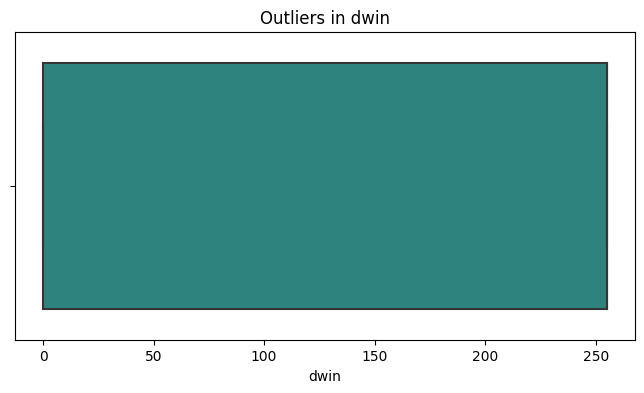

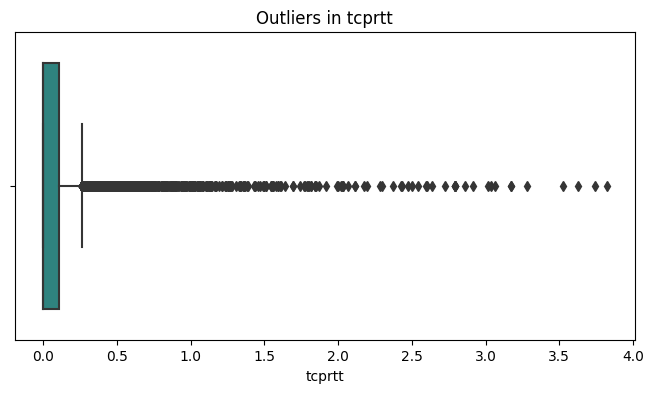

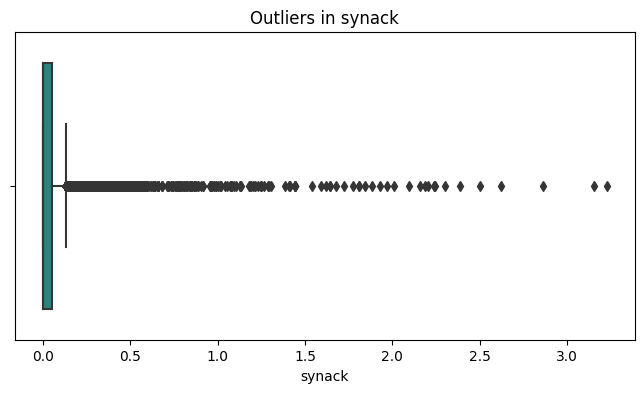

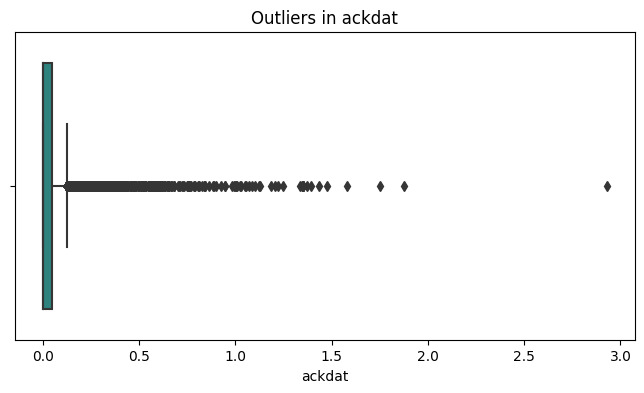

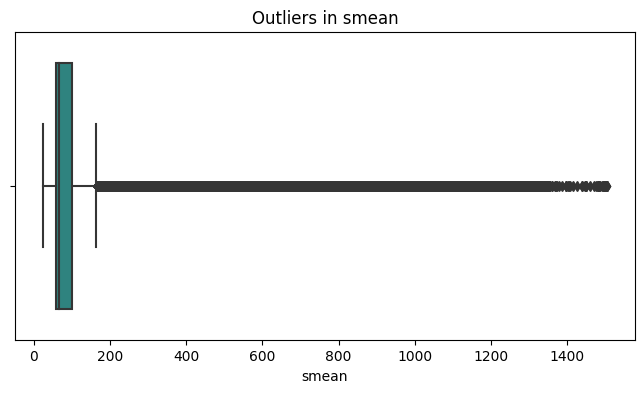

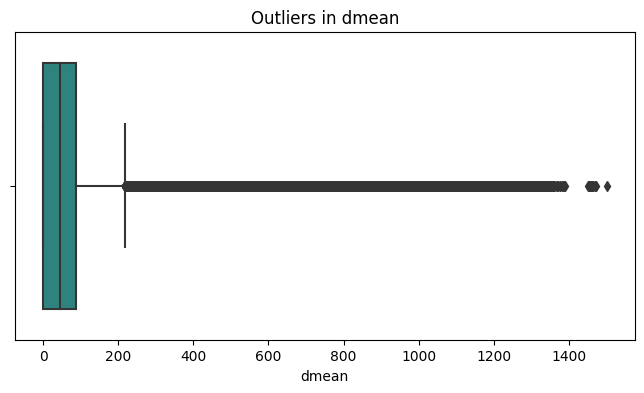

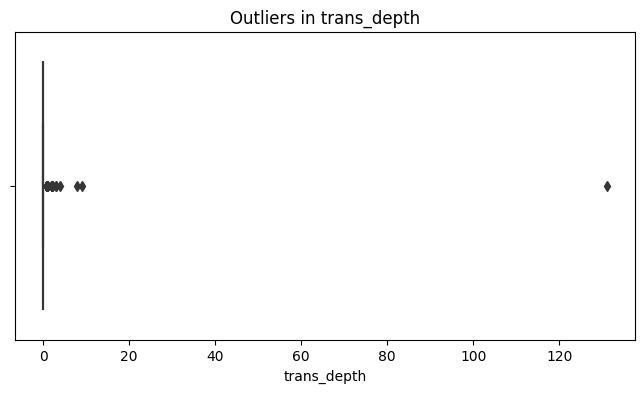

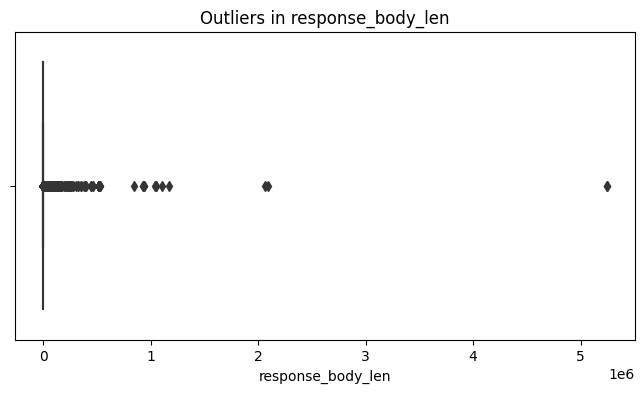

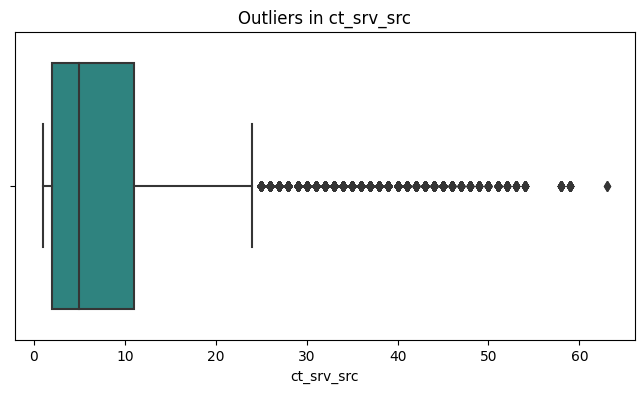

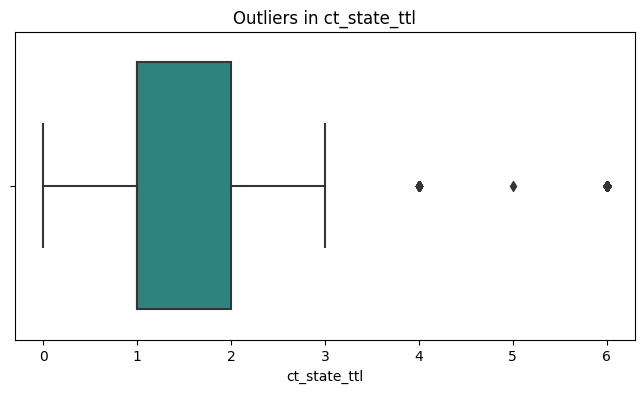

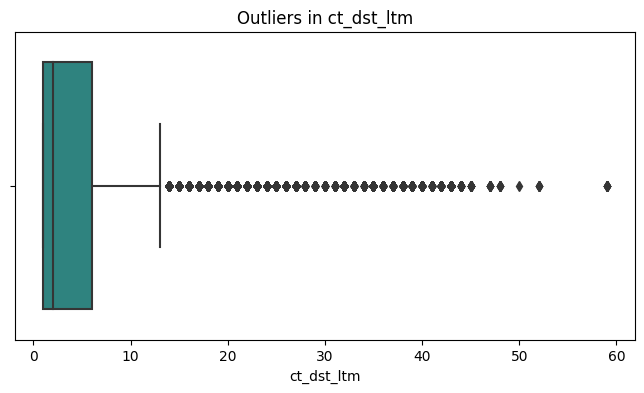

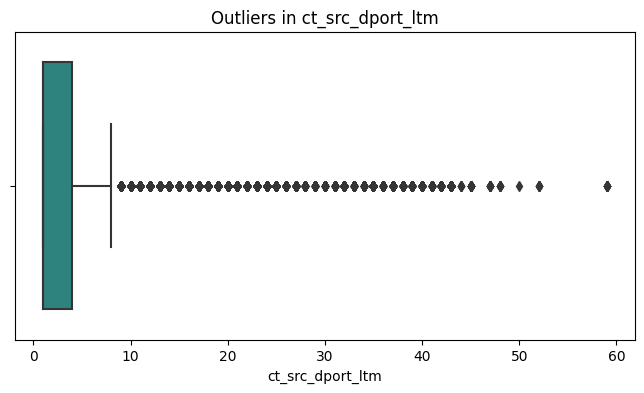

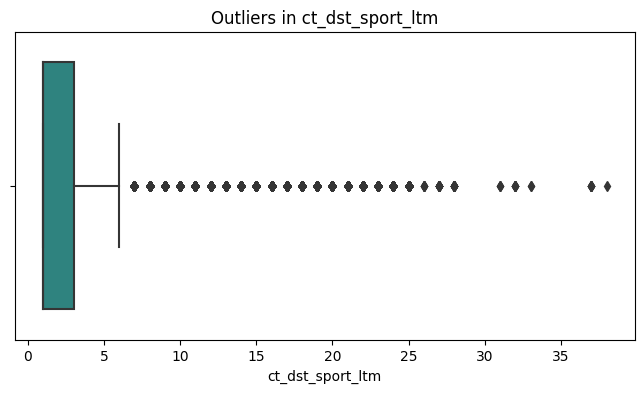

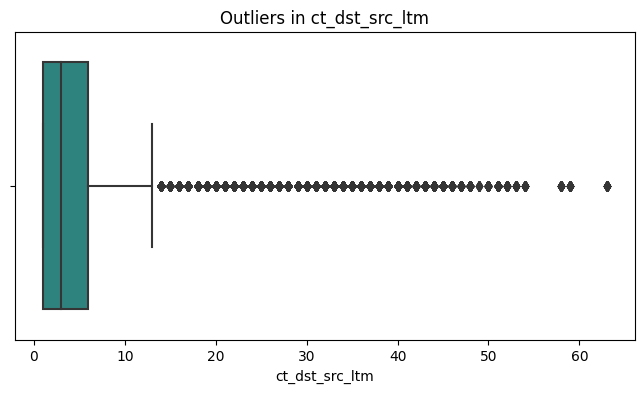

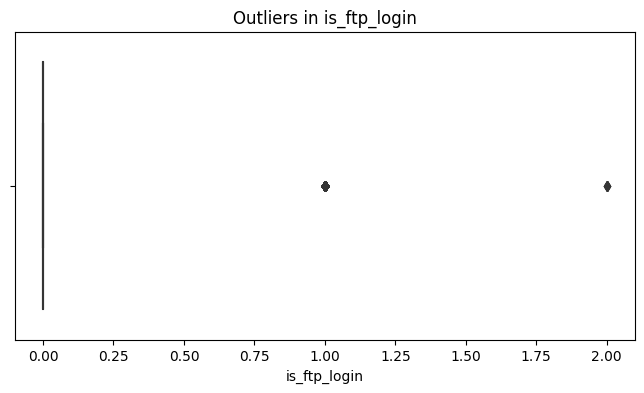

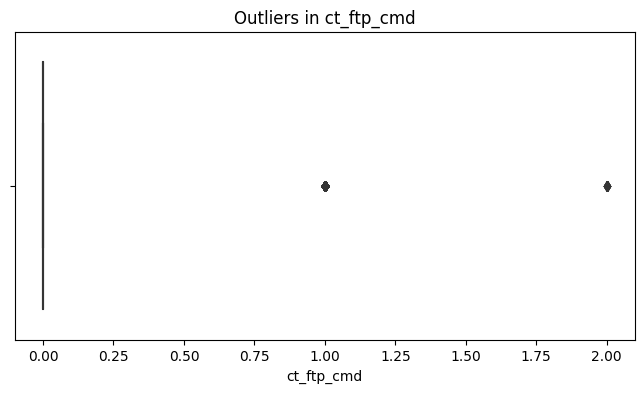

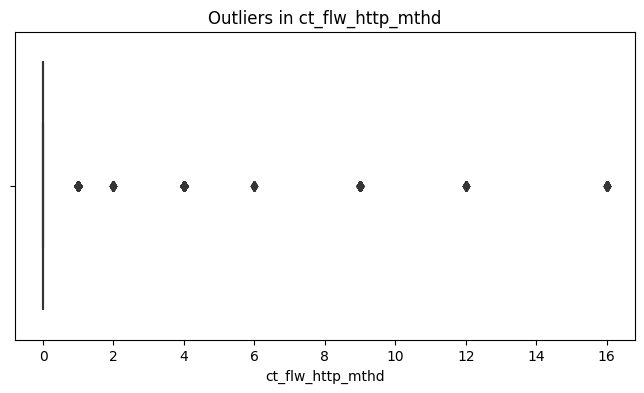

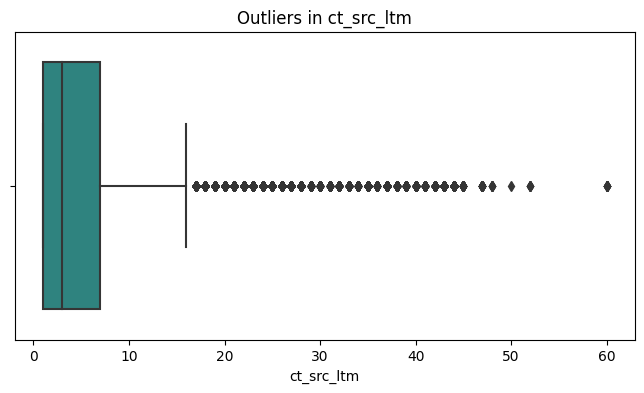

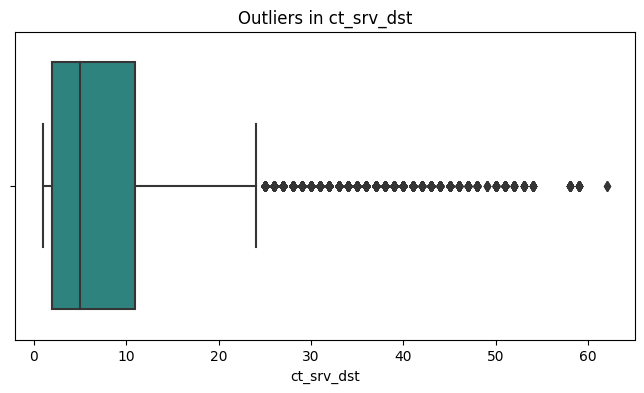

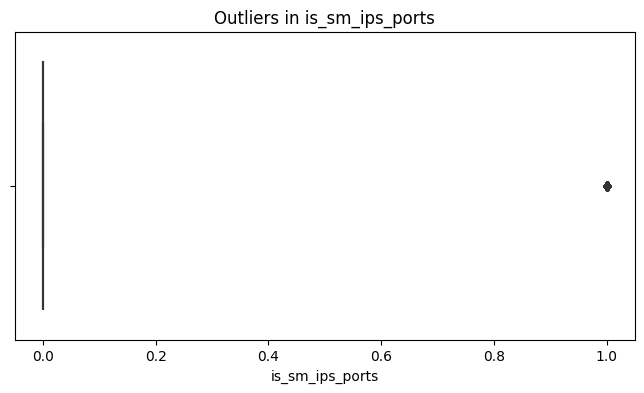

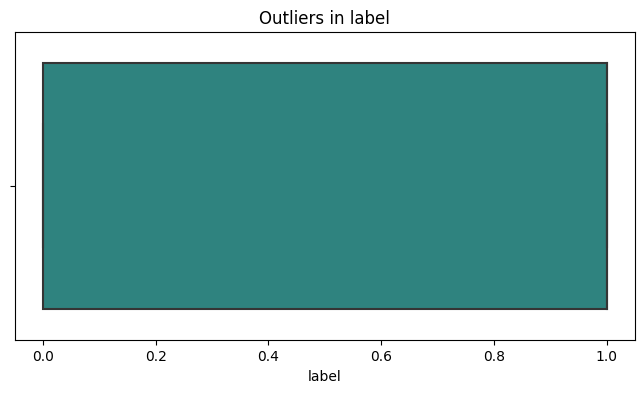

In [15]:
# Box plots to detect outliers
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=train_df, x=col, palette='viridis')
    plt.title(f'Outliers in {col}')
    plt.show()

## Multivariate Analysis

### Correlation Analysis

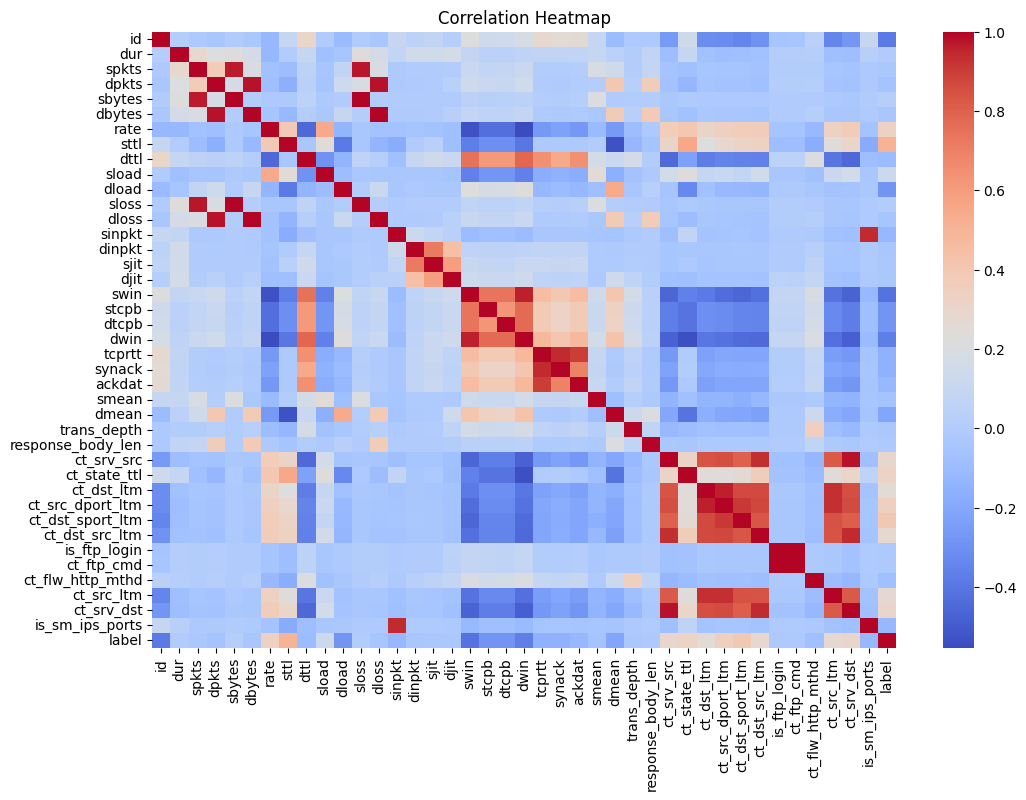

In [16]:
# Select numerical columns
numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix
correlation_matrix = train_df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


### Pair Plots



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

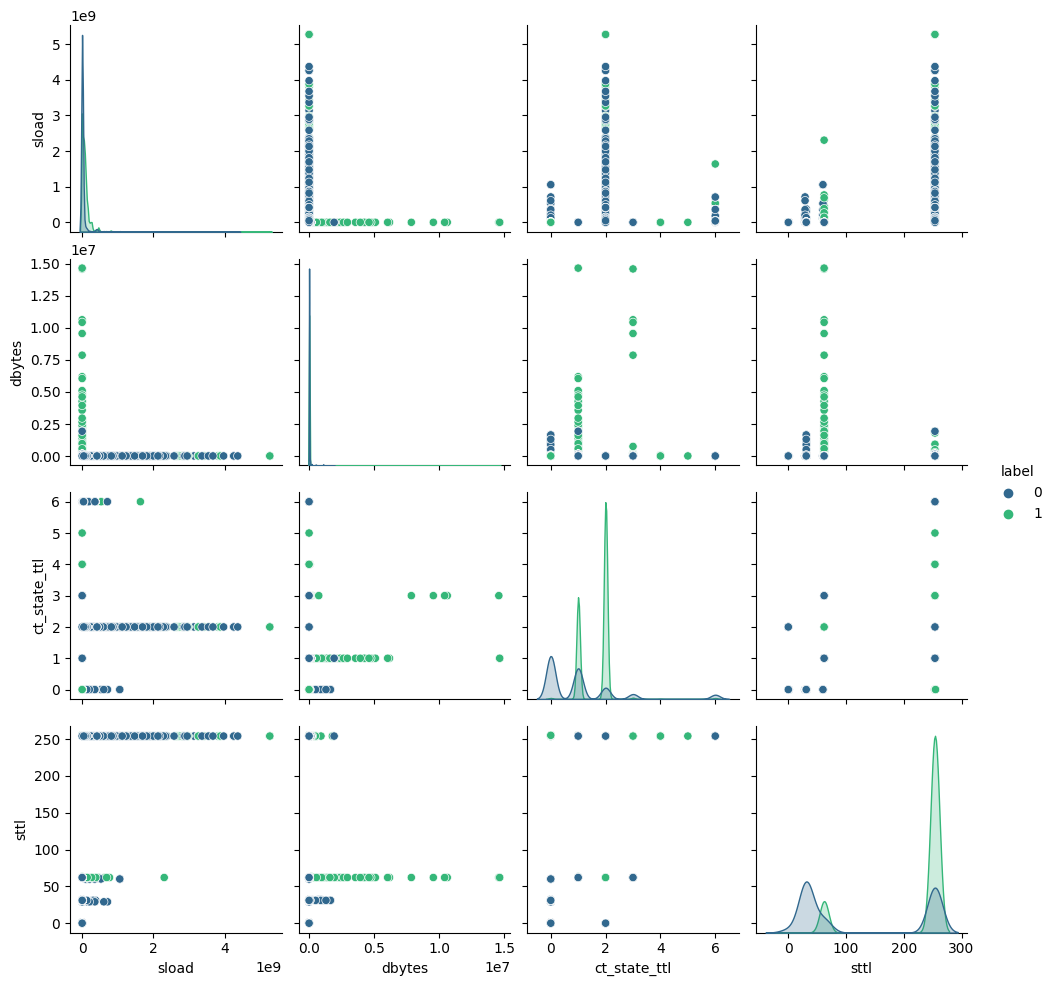

In [17]:
# Pair plot for important numerical features and the target
important_features = ['sload', 'dbytes', 'ct_state_ttl', 'sttl', 'label']
sns.pairplot(train_df[important_features], hue='label', palette='viridis')
plt.show()

## Correlation Analysis

label                1.000000
sttl                 0.504159
ct_dst_sport_ltm     0.393668
ct_src_dport_ltm     0.341513
rate                 0.328629
ct_state_ttl         0.318517
ct_srv_dst           0.292931
ct_srv_src           0.290195
ct_dst_src_ltm       0.279989
ct_src_ltm           0.276494
ct_dst_ltm           0.257995
sload                0.124548
sbytes               0.020641
sloss                0.006360
dur                 -0.001145
is_ftp_login        -0.016206
response_body_len   -0.016414
ct_ftp_cmd          -0.017138
trans_depth         -0.025804
djit                -0.027131
sjit                -0.027397
spkts               -0.027731
dbytes              -0.032632
dinpkt              -0.037585
dloss               -0.044399
smean               -0.061146
dpkts               -0.061515
ct_flw_http_mthd    -0.075028
dttl                -0.098591
is_sm_ips_ports     -0.117407
ackdat              -0.120522
sinpkt              -0.120768
tcprtt              -0.148800
synack    

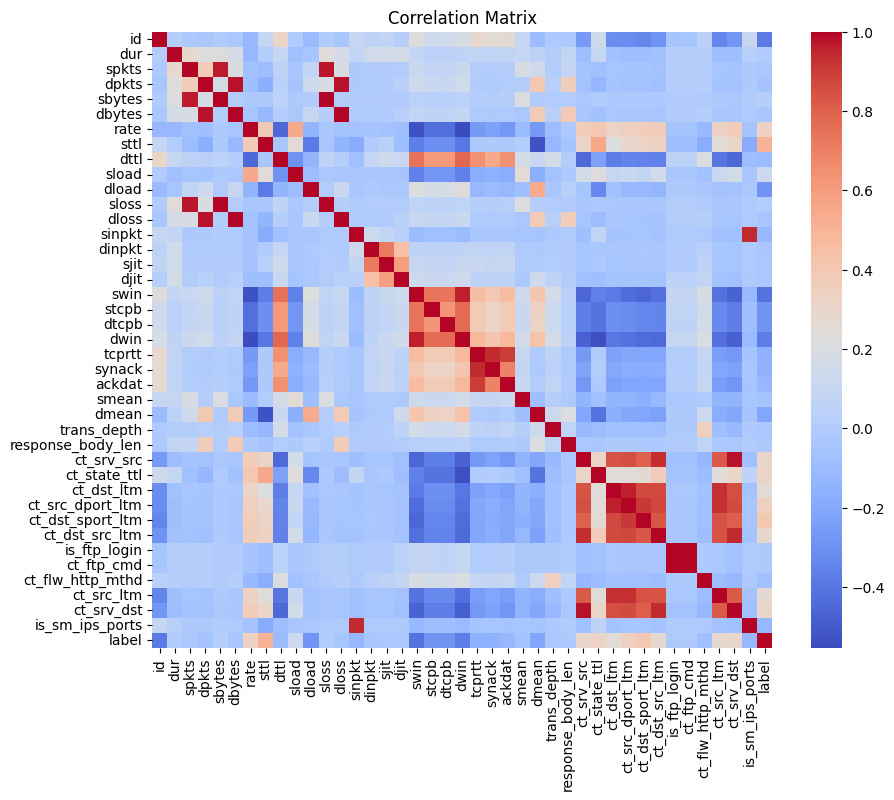

In [18]:
# Select numerical columns
numerical_columns = train_df.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix
correlation_matrix = train_df[numerical_columns].corr()
print(correlation_matrix['label'].sort_values(ascending=False))

# Correlation with the target variable
correlation_with_target = correlation_matrix['label'].sort_values(ascending=False)

# Display top features
print("Correlation with Target:")
print(correlation_with_target)

# Visualize the correlation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


## Chi-Square Test for Categorical Features

In [19]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# One-hot encode categorical features
categorical_columns = ['proto', 'service', 'state', 'attack_cat']
X_categorical = pd.get_dummies(train_df[categorical_columns], drop_first=True)
y = train_df['label']

# Chi-Square test
chi_scores = chi2(X_categorical, y)
chi_scores_df = pd.DataFrame({'Feature': X_categorical.columns, 'Chi-Square Score': chi_scores[0]})
chi_scores_df = chi_scores_df.sort_values(by='Chi-Square Score', ascending=False)

# Display top features
print("Chi-Square Scores for Categorical Features:")
print(chi_scores_df.head(10))


Chi-Square Scores for Categorical Features:
                 Feature  Chi-Square Score
153    attack_cat_Normal      45332.000000
152   attack_cat_Generic      15402.519192
145            state_INT      13972.114825
150  attack_cat_Exploits       9085.943704
131          service_dns       8075.868705
143            state_CON       7071.590913
110            proto_tcp       6745.419585
151   attack_cat_Fuzzers       4947.807288
144            state_FIN       4331.171802
116            proto_udp       3606.138507


## Feature Importance Using Random Forest

Top Features by Importance:
                 Feature  Importance
193    attack_cat_Normal    0.274243
0                     id    0.116037
7                   sttl    0.041948
6                   rate    0.035258
190  attack_cat_Exploits    0.033686
5                 dbytes    0.029158
4                 sbytes    0.028241
191   attack_cat_Fuzzers    0.026751
33        ct_dst_src_ltm    0.026236
9                  sload    0.024364


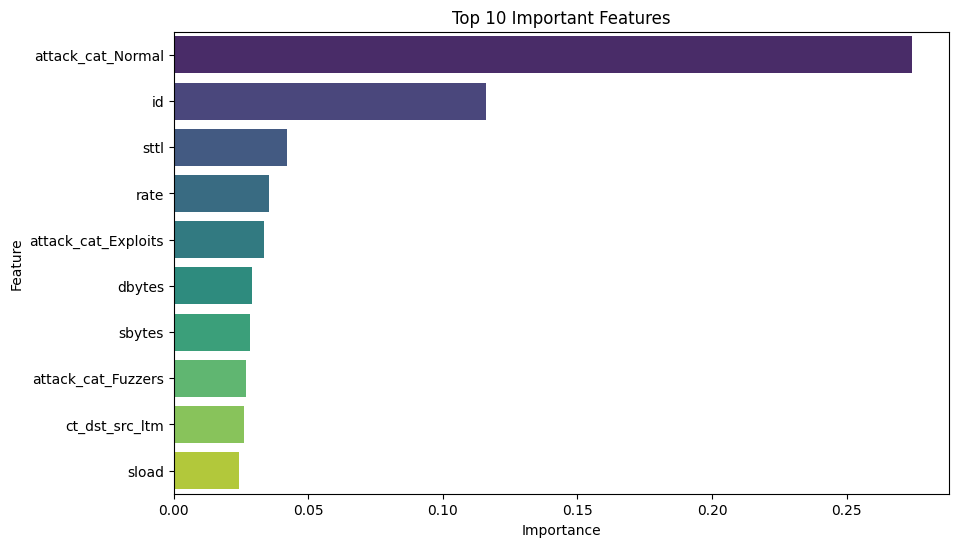

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Prepare data (drop the target variable)
X = train_df.drop(['label'], axis=1)
X = pd.get_dummies(X, drop_first=True)  # One-hot encode all categorical variables
y = train_df['label']

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Extract feature importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display top features
print("Top Features by Importance:")
print(feature_importances.head(10))

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Important Features")
plt.show()


## Convert Categorical Columns to numerical using LabelEncoder

In [21]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_columns:
    le = LabelEncoder()

    # Combine the training and test set categories
    le.fit(pd.concat([train_df[col], test_df[col]], axis=0))

    # Transform both datasets
    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

In [22]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_columns:
    le = LabelEncoder()

    # Fit the encoder on the training set
    le.fit(train_df[col])

    # Transform the training set
    train_df[col] = le.transform(train_df[col])

    # Transform the test set with a fallback for unseen categories
    test_df[col] = test_df[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)


## Drop the id Column

In [23]:
# Drop the ID column
train_df = train_df.drop(columns=['id'])


##  Encode Categorical Columns

### One-Hot Encode attack_cat

In [24]:
# One-hot encode attack_cat
train_df = pd.get_dummies(train_df, columns=['attack_cat'], drop_first=True)

# Check the new columns
print("Columns after encoding attack_cat:")
print([col for col in train_df.columns if 'attack_cat' in col])


Columns after encoding attack_cat:
['attack_cat_1', 'attack_cat_2', 'attack_cat_3', 'attack_cat_4', 'attack_cat_5', 'attack_cat_6', 'attack_cat_7', 'attack_cat_8', 'attack_cat_9']


 ### One-Hot Encode state and proto


In [25]:
# One-hot encode state and proto
train_df = pd.get_dummies(train_df, columns=['state', 'proto'], drop_first=True)

# Check the new columns
print("Columns after encoding state and proto:")
print(train_df.columns.tolist())


Columns after encoding state and proto:
['dur', 'service', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label', 'attack_cat_1', 'attack_cat_2', 'attack_cat_3', 'attack_cat_4', 'attack_cat_5', 'attack_cat_6', 'attack_cat_7', 'attack_cat_8', 'attack_cat_9', 'state_1', 'state_2', 'state_3', 'state_4', 'state_5', 'state_6', 'proto_1', 'proto_2', 'proto_3', 'proto_4', 'proto_5', 'proto_6', 'proto_7', 'proto_8', 'proto_9', 'proto_10', 'proto_11', 'proto_12', 'proto_13', 'proto_14', 'proto_15', 'proto_16', 'proto_17', 'proto_18', 'proto_19', 'proto_20', 'proto_21', 'proto_22', 'proto_23', 'pro

Debug

In [26]:
# Check all column names
print("Columns in train_df after encoding:")
print(train_df.columns.tolist())

# Check columns specifically related to 'attack_cat'
print("Columns related to attack_cat:")
print([col for col in train_df.columns if 'attack_cat' in col])

# Check columns specifically related to 'state'
print("Columns related to state:")
print([col for col in train_df.columns if 'state' in col])

# Check columns specifically related to 'proto'
print("Columns related to proto:")
print([col for col in train_df.columns if 'proto' in col])


Columns in train_df after encoding:
['dur', 'service', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label', 'attack_cat_1', 'attack_cat_2', 'attack_cat_3', 'attack_cat_4', 'attack_cat_5', 'attack_cat_6', 'attack_cat_7', 'attack_cat_8', 'attack_cat_9', 'state_1', 'state_2', 'state_3', 'state_4', 'state_5', 'state_6', 'proto_1', 'proto_2', 'proto_3', 'proto_4', 'proto_5', 'proto_6', 'proto_7', 'proto_8', 'proto_9', 'proto_10', 'proto_11', 'proto_12', 'proto_13', 'proto_14', 'proto_15', 'proto_16', 'proto_17', 'proto_18', 'proto_19', 'proto_20', 'proto_21', 'proto_22', 'proto_23', 'proto_2

## Finalize the Feature Set

In [27]:
# Updated final features based on encoded columns
final_features = [
    'rate', 'sttl', 'sload', 'ct_state_ttl', 'ct_dst_sport_ltm',
    'attack_cat_1', 'attack_cat_2', 'attack_cat_3',  # Include relevant attack_cat columns
    'state_1', 'state_2',  # Include relevant state columns
    # Optional: Include a few proto columns if needed
    'proto_1', 'proto_2', 'proto_3'
]

# Subset the dataset
X_final = train_df[final_features]
y_final = train_df['label']
print("Final feature set prepared.")



Final feature set prepared.


## Verify Train-Test Consistency

In [28]:
# Check if train_df and test_df have the same columns
print("Train columns:", train_df.columns.tolist())
print("Test columns:", test_df.columns.tolist())


Train columns: ['dur', 'service', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label', 'attack_cat_1', 'attack_cat_2', 'attack_cat_3', 'attack_cat_4', 'attack_cat_5', 'attack_cat_6', 'attack_cat_7', 'attack_cat_8', 'attack_cat_9', 'state_1', 'state_2', 'state_3', 'state_4', 'state_5', 'state_6', 'proto_1', 'proto_2', 'proto_3', 'proto_4', 'proto_5', 'proto_6', 'proto_7', 'proto_8', 'proto_9', 'proto_10', 'proto_11', 'proto_12', 'proto_13', 'proto_14', 'proto_15', 'proto_16', 'proto_17', 'proto_18', 'proto_19', 'proto_20', 'proto_21', 'proto_22', 'proto_23', 'proto_24', 'proto_25', 'prot

Encode Test Dataset

In [29]:
# Drop the ID column
test_df = test_df.drop(columns=['id'])
print("ID column dropped from test_df.")


ID column dropped from test_df.


In [30]:
# One-hot encode attack_cat, state, and proto in test_df
test_df = pd.get_dummies(test_df, columns=['attack_cat', 'state', 'proto'], drop_first=True)

# Check the updated columns
print("Columns in test_df after encoding:")
print(test_df.columns.tolist())


Columns in test_df after encoding:
['dur', 'service', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label', 'attack_cat_1', 'attack_cat_2', 'attack_cat_3', 'attack_cat_4', 'attack_cat_5', 'attack_cat_6', 'attack_cat_7', 'attack_cat_8', 'attack_cat_9', 'state_2', 'state_3', 'state_4', 'state_5', 'state_6', 'proto_0', 'proto_1', 'proto_2', 'proto_3', 'proto_4', 'proto_5', 'proto_6', 'proto_7', 'proto_8', 'proto_9', 'proto_10', 'proto_11', 'proto_12', 'proto_13', 'proto_14', 'proto_15', 'proto_16', 'proto_17', 'proto_18', 'proto_19', 'proto_20', 'proto_21', 'proto_22', 'proto_23', 'proto_24

In [31]:
# Align columns in test_df with train_df
missing_cols = set(train_df.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0  # Add missing columns with default value 0

# Ensure test_df has the same columns as train_df
test_df = test_df[train_df.columns]

print("Columns aligned between train_df and test_df.")


Columns aligned between train_df and test_df.


In [32]:
# Features and target for training set
X_train = train_df.drop(columns=['label'])
y_train = train_df['label']

# Features and target for testing set
X_test = test_df.drop(columns=['label'])
y_test = test_df['label']

print("Feature sets prepared.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


Feature sets prepared.
X_train shape: (82332, 185)
X_test shape: (175341, 185)


In [33]:
# Check alignment
print("Are train and test feature sets aligned?")
print(set(X_train.columns) == set(X_test.columns))


Are train and test feature sets aligned?
True


## Train Data Preperation

### Separate Features (X) and Target (y)

In [34]:
# Define features and target for training set
X_train = train_df[final_features]
y_train = train_df['label']

# Define features and target for testing set
X_test = test_df[final_features]
y_test = test_df['label']

print("Train and test data prepared.")


Train and test data prepared.


In [35]:
# Check class distribution in the training set
print("Class distribution in training set:")
print(y_train.value_counts())

# Check class distribution in the test set
print("Class distribution in test set:")
print(y_test.value_counts())


Class distribution in training set:
label
1    45332
0    37000
Name: count, dtype: int64
Class distribution in test set:
label
1    119341
0     56000
Name: count, dtype: int64


## Train the Random Forest Model

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')  # Use `class_weight='balanced'` to address slight imbalance

# Train the model
rf_model.fit(X_train, y_train)

print("Model trained without balancing the dataset.")


Model trained without balancing the dataset.


In [37]:
# Predict on the test set
y_pred = rf_model.predict(X_test)
print("Predictions completed on test set.")


Predictions completed on test set.


In [38]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.96      0.87     56000
           1       0.98      0.88      0.93    119341

    accuracy                           0.91    175341
   macro avg       0.89      0.92      0.90    175341
weighted avg       0.92      0.91      0.91    175341

Confusion Matrix:
[[ 53773   2227]
 [ 14001 105340]]


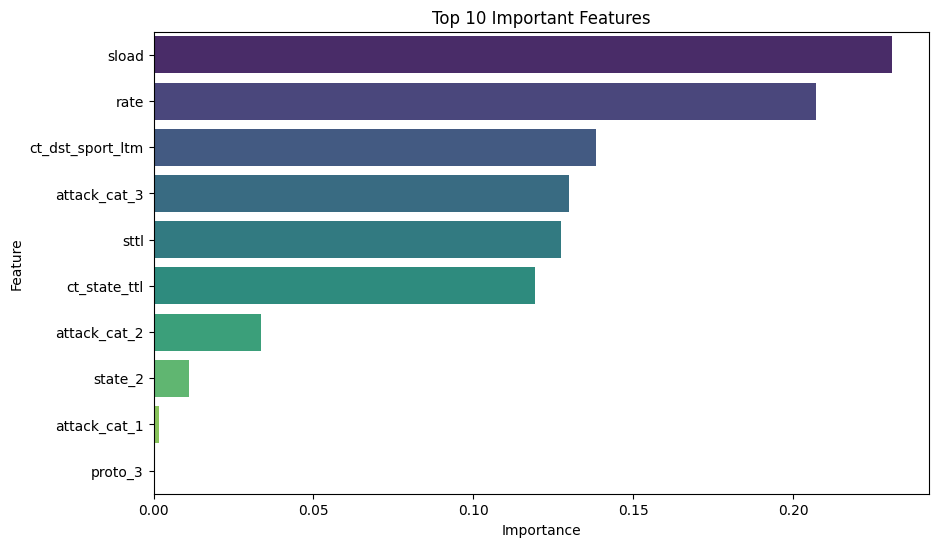

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importance
feature_importances = pd.DataFrame({
    'Feature': final_features,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot the top 10 important features
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Important Features')
plt.show()


In [40]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt


In [41]:
def plot_precision_recall_curve(y_true, y_probs, model_name):
    """
    Plots the Precision-Recall curve for a given model.
    Args:
        y_true: True labels
        y_probs: Predicted probabilities (positive class)
        model_name: Name of the model (str)
    """
    precision, recall, _ = precision_recall_curve(y_true, y_probs)
    pr_auc = auc(recall, precision)
    
    plt.plot(recall, precision, label=f'{model_name} (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')


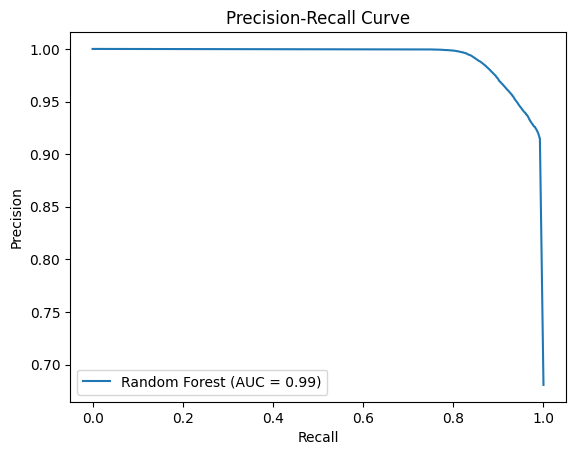

In [42]:
# Get probabilities for the positive class
rf_probs = rf_model.predict_proba(X_test)[:, 1]
plot_precision_recall_curve(y_test, rf_probs, 'Random Forest')


## Train the XGBoost Model

In [43]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.97      0.85     56000
           1       0.98      0.86      0.92    119341

    accuracy                           0.89    175341
   macro avg       0.87      0.91      0.89    175341
weighted avg       0.91      0.89      0.90    175341

XGBoost Confusion Matrix:
[[ 54163   1837]
 [ 16625 102716]]


## Train the LightGBM Model

In [45]:
!pip install lightgbm


In [46]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the LightGBM model
lgbm_model = LGBMClassifier(random_state=42, class_weight='balanced')

# Train the model on the training set
lgbm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluate the model
print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgbm))

print("LightGBM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgbm))


[LightGBM] [Info] Number of positive: 45332, number of negative: 37000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006626 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 572
[LightGBM] [Info] Number of data points in the train set: 82332, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.98      0.84     56000
           1       0.99      0.83      0.90    119341

    accuracy                           0.88    175341
   macro avg       0.86      0.91      0.87    175341
weighted avg       0.91      0.88      0.88    175341

LightGBM Confusion Matrix:
[[54805  1195]
 [19824 99517]]


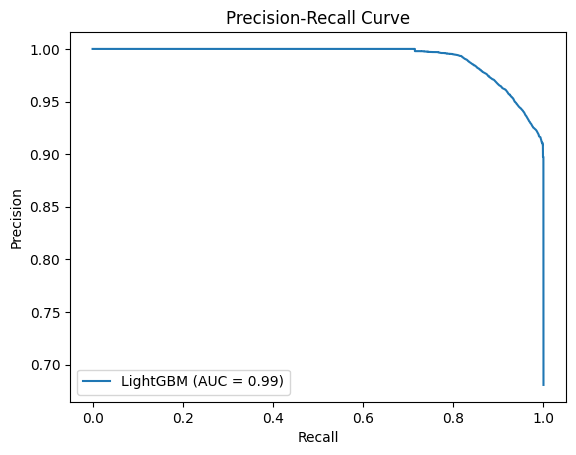

In [47]:
# Get probabilities for the positive class
lgbm_probs = lgbm_model.predict_proba(X_test)[:, 1]
plot_precision_recall_curve(y_test, lgbm_probs, 'LightGBM')

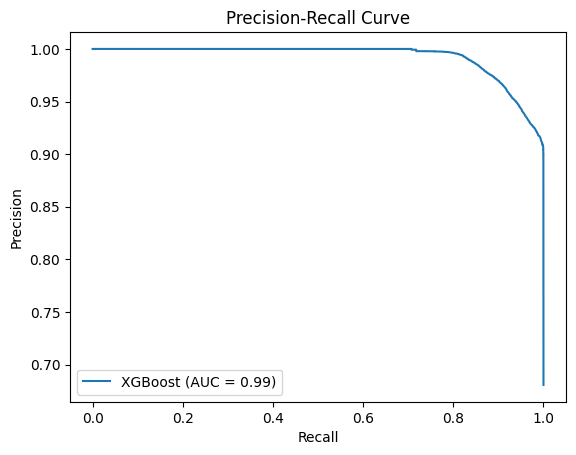

In [48]:
# Get probabilities for the positive class
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
plot_precision_recall_curve(y_test, xgb_probs, 'XGBoost')


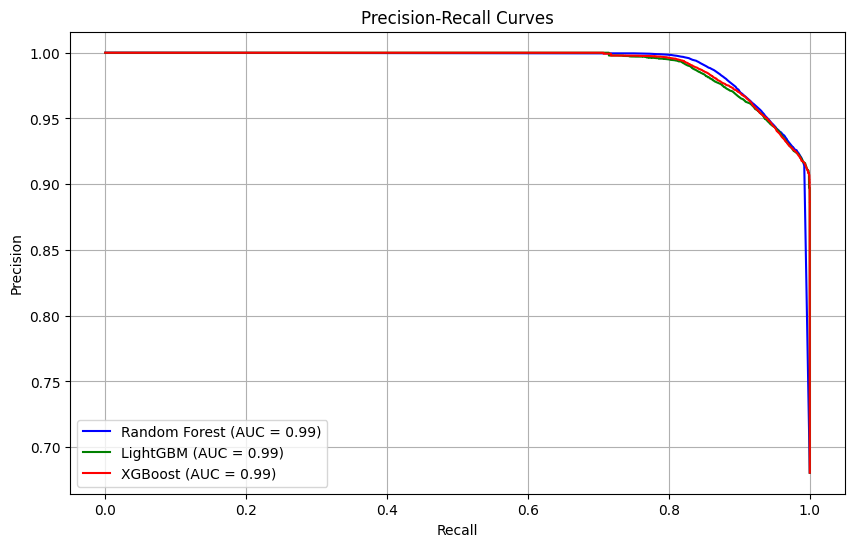

In [49]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Function to plot a single PR curve
def plot_combined_pr_curves(models, colors, labels, X_test, y_test):
    """
    Plots combined PR curves for multiple models.
    
    Args:
        models: List of trained models.
        colors: List of colors for each model's curve.
        labels: List of labels (model names).
        X_test: Test feature dataset.
        y_test: True labels for the test dataset.
    """
    plt.figure(figsize=(10, 6))
    
    for model, color, label in zip(models, colors, labels):
        # Get predicted probabilities for the positive class
        y_probs = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_probs)
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, color=color, label=f"{label} (AUC = {pr_auc:.2f})")
    
    # Plot settings
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves')
    plt.legend(loc='lower left')
    plt.grid()
    plt.show()

# Example usage with Random Forest, LightGBM, and XGBoost
models = [rf_model, lgbm_model, xgb_model]
colors = ['blue', 'green', 'red']
labels = ['Random Forest', 'LightGBM', 'XGBoost']

plot_combined_pr_curves(models, colors, labels, X_test, y_test)


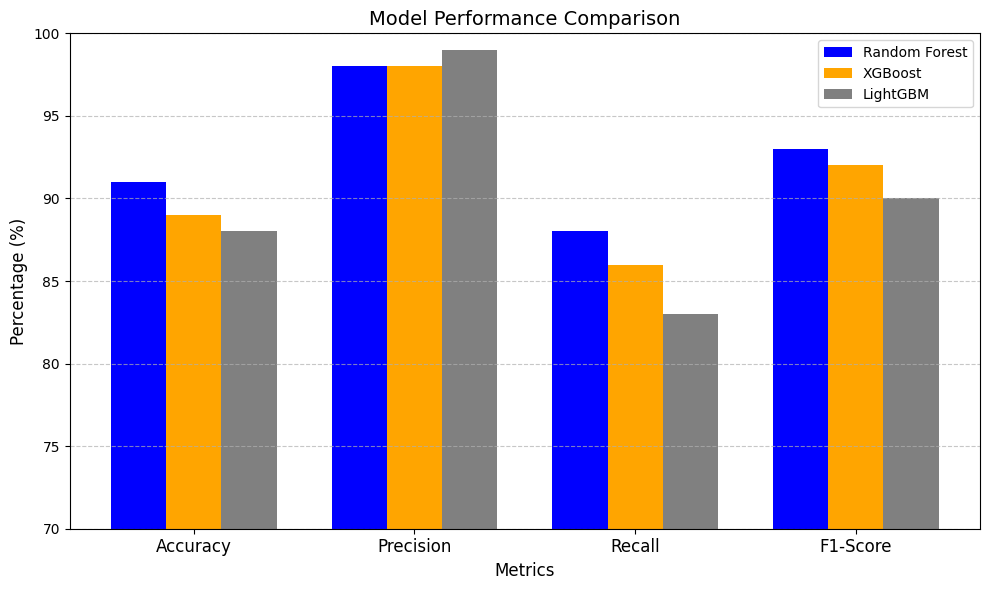

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Data for the models and their metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
random_forest = [91, 98, 88, 93]  # Example values
xgboost = [89, 98, 86, 92]
lightgbm = [88, 99, 83, 90]

# Create the bar plot
x = np.arange(len(metrics))  # Label locations
width = 0.25  # Width of the bars

plt.figure(figsize=(10, 6))
plt.bar(x - width, random_forest, width, label='Random Forest', color='blue')
plt.bar(x, xgboost, width, label='XGBoost', color='orange')
plt.bar(x + width, lightgbm, width, label='LightGBM', color='gray')

# Add labels, title, and legend
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.title('Model Performance Comparison', fontsize=14)
plt.xticks(x, metrics, fontsize=12)
plt.ylim(70, 100)  # Adjust the range for better visualization
plt.legend()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

#  Hyperparameter Tuning

## Random Forest Tuning

In [51]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid=rf_param_grid,
    scoring='f1',
    cv=3,
    verbose=2
)

# Fit the model
rf_grid_search.fit(X_train, y_train)

# Best parameters and evaluation
print("Best Parameters for Random Forest:", rf_grid_search.best_params_)
rf_best_model = rf_grid_search.best_estimator_

# Evaluate on test data
y_rf_pred = rf_best_model.predict(X_test)
print("Tuned Random Forest Classification Report:")
print(classification_report(y_test, y_rf_pred))


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   5.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   5.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   5.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   8.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   8.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   7.9s
[CV] END max_depth=10, min_sa

## XGBoost Tuning

In [52]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define parameter grid
xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [6, 10, 20],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0]
}

# Initialize GridSearchCV for XGBoost
xgb_grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_grid=xgb_param_grid,
    scoring='f1',
    cv=3,
    verbose=2
)

# Fit the model
xgb_grid_search.fit(X_train, y_train)

# Best parameters and evaluation
print("Best Parameters for XGBoost:", xgb_grid_search.best_params_)
xgb_best_model = xgb_grid_search.best_estimator_

# Evaluate on test data
y_xgb_pred = xgb_best_model.predict(X_test)
print("Tuned XGBoost Classification Report:")
print(classification_report(y_test, y_xgb_pred))


Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=200, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=200, subsample=1.0; total time=   0.6

 ## LightGBM Tuning

In [53]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

# Define parameter grid
lgbm_param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [10, 20, None],
    'n_estimators': [100, 200, 300],
    'num_leaves': [31, 50, 100],
    'subsample': [0.8, 1.0]
}

# Initialize GridSearchCV for LightGBM
lgbm_grid_search = GridSearchCV(
    estimator=LGBMClassifier(random_state=42, class_weight='balanced'),
    param_grid=lgbm_param_grid,
    scoring='f1',
    cv=3,
    verbose=2
)

# Fit the model
lgbm_grid_search.fit(X_train, y_train)

# Best parameters and evaluation
print("Best Parameters for LightGBM:", lgbm_grid_search.best_params_)
lgbm_best_model = lgbm_grid_search.best_estimator_

# Evaluate on test data
y_lgbm_pred = lgbm_best_model.predict(X_test)
print("Tuned LightGBM Classification Report:")
print(classification_report(y_test, y_lgbm_pred))


Fitting 3 folds for each of 162 candidates, totalling 486 fits
[LightGBM] [Info] Number of positive: 30222, number of negative: 24666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, num_leaves=31, subsample=0.8; total time=   0.4s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can se

[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, num_leaves=100, subsample=1.0; total time=   0.2s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000930 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, num_leaves=100, subsample=1.0; total time=   0.2s
[LightGBM] [Info] Number of positive: 30222, number of negative: 24666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000951 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV] END learning_rate=0.01, max_depth=10, n_estimators=200, num_leaves=31, subsample=0.8; total time=   0.3s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000993 seconds.
You can set `force_row_wise=true` to remove the o

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV] END learning_rate=0.01, max_depth=10, n_estimators=200, num_leaves=100, subsample=0.8; total time=   0.6s
[LightGBM] [Info] Number of positive: 30222, number of negative: 24666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001029 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV] END learning_rate=0.01, max_depth=10, n_estimators=200, num_leaves=100, subsample=1.0; total time=   0.6s
[LightGBM] [Info] Number of positive: 30222, number of negative: 24666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV] END learning_rate=0.01, max_depth=10, n_estimators=300, num_leaves=31, subsample=0.8; total time=   0.4s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001090 seconds.
You can set `force_row_wise=true` to remove the o

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV] END learning_rate=0.01, max_depth=10, n_estimators=300, num_leaves=100, subsample=0.8; total time=   0.7s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[CV] END learning_rate=0.01, max_depth=10, n_estimators=300, num_leaves=100, subsample=0.8; total time=   0.8s
[LightGBM] [Info] Number of positive: 30222, number of negative: 24666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000931 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV] END learning_rate=0.01, max_depth=20, n_estimators=100, num_leaves=31, subsample=0.8; total time=   0.2s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[CV] END learning_rate=0.01, max_depth=20, n_estimators=100, num_leaves=31, subsample=0.8; total time=   0.3s
[LightGBM] [Info] Number of positive: 30222, number of negative: 24666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000987 seconds.
You can set `force_row_wise=true` to remove the 

[CV] END learning_rate=0.01, max_depth=20, n_estimators=100, num_leaves=100, subsample=0.8; total time=   0.3s
[LightGBM] [Info] Number of positive: 30222, number of negative: 24666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV] END learning_rate=0.01, max_depth=20, n_estimators=100, num_leaves=100, subsample=1.0; total time=   0.3s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001163 seconds.
You can set `force_row_wise=true` to remove the 

[CV] END learning_rate=0.01, max_depth=20, n_estimators=200, num_leaves=50, subsample=1.0; total time=   0.4s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[CV] END learning_rate=0.01, max_depth=20, n_estimators=200, num_leaves=50, subsample=1.0; total time=   0.4s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000897 seconds.
You can set `force_row_wise=true` to remove the 

[CV] END learning_rate=0.01, max_depth=20, n_estimators=300, num_leaves=31, subsample=1.0; total time=   0.5s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[CV] END learning_rate=0.01, max_depth=20, n_estimators=300, num_leaves=31, subsample=1.0; total time=   0.5s
[LightGBM] [Info] Number of positive: 30222, number of negative: 24666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000960 seconds.
You can set `force_row_wise=true` to remove the 

[CV] END learning_rate=0.01, max_depth=20, n_estimators=300, num_leaves=100, subsample=1.0; total time=   0.9s
[LightGBM] [Info] Number of positive: 30222, number of negative: 24666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV] END learning_rate=0.01, max_depth=None, n_estimators=100, num_leaves=31, subsample=0.8; total time=   0.2s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001044 seconds.
You can set `force_row_wise=true` to remove the

[CV] END learning_rate=0.01, max_depth=None, n_estimators=100, num_leaves=100, subsample=0.8; total time=   0.3s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[CV] END learning_rate=0.01, max_depth=None, n_estimators=100, num_leaves=100, subsample=0.8; total time=   0.3s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000950 seconds.
You can set `force_row_wise=true` to remov

[CV] END learning_rate=0.01, max_depth=None, n_estimators=200, num_leaves=50, subsample=0.8; total time=   0.4s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[CV] END learning_rate=0.01, max_depth=None, n_estimators=200, num_leaves=50, subsample=0.8; total time=   0.4s
[LightGBM] [Info] Number of positive: 30222, number of negative: 24666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001027 seconds.
You can set `force_row_wise=true` to remove 

[CV] END learning_rate=0.01, max_depth=None, n_estimators=300, num_leaves=31, subsample=0.8; total time=   0.5s
[LightGBM] [Info] Number of positive: 30222, number of negative: 24666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV] END learning_rate=0.01, max_depth=None, n_estimators=300, num_leaves=31, subsample=1.0; total time=   0.5s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000872 seconds.
You can set `force_row_wise=true` to remove th

[CV] END learning_rate=0.01, max_depth=None, n_estimators=300, num_leaves=100, subsample=1.0; total time=   1.0s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[CV] END learning_rate=0.01, max_depth=None, n_estimators=300, num_leaves=100, subsample=1.0; total time=   0.9s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001112 seconds.
You can set `force_row_wise=true` to remov

[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, num_leaves=50, subsample=1.0; total time=   0.2s
[LightGBM] [Info] Number of positive: 30222, number of negative: 24666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 559
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, num_leaves=100, subsample=0.8; total time=   0.3s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, num_leaves=100, subsample=1.0; total time=   0.3s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, num_leaves=31, subsample=0.8; total time=   0.3s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, num_leaves=31, subsample=0.8; total time=   0.3s
[LightGBM] [Info] Number of positive: 30222, number of negative: 24666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001029 seconds.
You can set `force_row_wise=true` to remove the ov

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV] END learning_rate=0.1, max_depth=10, n_estimators=200, num_leaves=100, subsample=1.0; total time=   0.5s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV] END learning_rate=0.1, max_depth=10, n_estimators=300, num_leaves=50, subsample=1.0; total time=   0.7s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV] END learning_rate=0.1, max_depth=20, n_estimators=100, num_leaves=31, subsample=1.0; total time=   0.2s
[LightGBM] [Info] Number of positive: 30222, number of negative: 24666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000855 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV] END learning_rate=0.1, max_depth=20, n_estimators=100, num_leaves=50, subsample=0.8; total time=   0.2s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001040 seconds.
You can set `force_row_wise=true` to remove the over

[CV] END learning_rate=0.1, max_depth=20, n_estimators=200, num_leaves=31, subsample=0.8; total time=   0.3s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000921 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[CV] END learning_rate=0.1, max_depth=20, n_estimators=200, num_leaves=31, subsample=0.8; total time=   0.3s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001060 seconds.
You can set `force_row_wise=true` to remove the ov

[CV] END learning_rate=0.1, max_depth=20, n_estimators=200, num_leaves=100, subsample=0.8; total time=   0.9s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[CV] END learning_rate=0.1, max_depth=20, n_estimators=200, num_leaves=100, subsample=0.8; total time=   0.7s
[LightGBM] [Info] Number of positive: 30222, number of negative: 24666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000791 seconds.
You can set `force_row_wise=true` to remove the 

[CV] END learning_rate=0.1, max_depth=20, n_estimators=300, num_leaves=50, subsample=0.8; total time=   0.5s
[LightGBM] [Info] Number of positive: 30222, number of negative: 24666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV] END learning_rate=0.1, max_depth=20, n_estimators=300, num_leaves=50, subsample=1.0; total time=   0.5s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001004 seconds.
You can set `force_row_wise=true` to remove the over

[CV] END learning_rate=0.1, max_depth=None, n_estimators=100, num_leaves=31, subsample=1.0; total time=   0.2s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000899 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[CV] END learning_rate=0.1, max_depth=None, n_estimators=100, num_leaves=31, subsample=1.0; total time=   0.2s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000972 seconds.
You can set `force_row_wise=true` to remove th

[CV] END learning_rate=0.1, max_depth=None, n_estimators=100, num_leaves=100, subsample=1.0; total time=   0.3s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[CV] END learning_rate=0.1, max_depth=None, n_estimators=100, num_leaves=100, subsample=1.0; total time=   0.3s
[LightGBM] [Info] Number of positive: 30222, number of negative: 24666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001035 seconds.
You can set `force_row_wise=true` to remove 

[CV] END learning_rate=0.1, max_depth=None, n_estimators=200, num_leaves=50, subsample=1.0; total time=   0.3s
[LightGBM] [Info] Number of positive: 30222, number of negative: 24666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV] END learning_rate=0.1, max_depth=None, n_estimators=200, num_leaves=100, subsample=0.8; total time=   0.5s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001011 seconds.
You can set `force_row_wise=true` to remove the

[CV] END learning_rate=0.1, max_depth=None, n_estimators=300, num_leaves=50, subsample=0.8; total time=   0.5s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000920 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[CV] END learning_rate=0.1, max_depth=None, n_estimators=300, num_leaves=50, subsample=0.8; total time=   0.5s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000955 seconds.
You can set `force_row_wise=true` to remove th

[CV] END learning_rate=0.3, max_depth=10, n_estimators=100, num_leaves=31, subsample=0.8; total time=   0.2s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[CV] END learning_rate=0.3, max_depth=10, n_estimators=100, num_leaves=31, subsample=0.8; total time=   0.1s
[LightGBM] [Info] Number of positive: 30222, number of negative: 24666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000919 seconds.
You can set `force_row_wise=true` to remove the ov

[CV] END learning_rate=0.3, max_depth=10, n_estimators=100, num_leaves=100, subsample=0.8; total time=   0.2s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[CV] END learning_rate=0.3, max_depth=10, n_estimators=100, num_leaves=100, subsample=1.0; total time=   0.2s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[CV] END learning_rate=0.3, max_depth=10, n_estimators=200, num_leaves=31, subsample=0.8; total time=   0.2s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[CV] END learning_rate=0.3, max_depth=10, n_estimators=200, num_leaves=31, subsample=0.8; total time=   0.2s
[LightGBM] [Info] Number of positive: 30222, number of negative: 24666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001056 seconds.
You can set `force_row_wise=true` to remove the ov

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV] END learning_rate=0.3, max_depth=10, n_estimators=200, num_leaves=100, subsample=0.8; total time=   0.5s
[LightGBM] [Info] Number of positive: 30222, number of negative: 24666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000970 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV] END learning_rate=0.3, max_depth=10, n_estimators=300, num_leaves=31, subsample=1.0; total time=   0.3s
[LightGBM] [Info] Number of positive: 30222, number of negative: 24666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.3, max_depth=10, n_estimators=300, num_leaves=50, subsample=0.8; total time=   0.4s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[Light

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV] END learning_rate=0.3, max_depth=10, n_estimators=300, num_leaves=100, subsample=0.8; total time=   0.7s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[CV] END learning_rate=0.3, max_depth=10, n_estimators=300, num_leaves=100, subsample=0.8; total time=   0.7s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000902 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV] END learning_rate=0.3, max_depth=20, n_estimators=100, num_leaves=50, subsample=0.8; total time=   0.2s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001022 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[CV] END learning_rate=0.3, max_depth=20, n_estimators=100, num_leaves=50, subsample=0.8; total time=   0.2s
[LightGBM] [Info] Number of positive: 30222, number of negative: 24666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000944 seconds.
You can set `force_row_wise=true` to remove the ov

[CV] END learning_rate=0.3, max_depth=20, n_estimators=200, num_leaves=31, subsample=0.8; total time=   0.3s
[LightGBM] [Info] Number of positive: 30222, number of negative: 24666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV] END learning_rate=0.3, max_depth=20, n_estimators=200, num_leaves=31, subsample=1.0; total time=   0.3s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001072 seconds.
You can set `force_row_wise=true` to remove the over

[LightGBM] [Info] Number of positive: 30222, number of negative: 24666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV] END learning_rate=0.3, max_depth=20, n_estimators=200, num_leaves=100, subsample=1.0; total time=   0.5s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[Ligh

[CV] END learning_rate=0.3, max_depth=20, n_estimators=300, num_leaves=50, subsample=1.0; total time=   0.4s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[CV] END learning_rate=0.3, max_depth=20, n_estimators=300, num_leaves=50, subsample=1.0; total time=   0.5s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001053 seconds.
You can set `force_row_wise=true` to remove the ov

[CV] END learning_rate=0.3, max_depth=None, n_estimators=100, num_leaves=31, subsample=1.0; total time=   0.1s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001429 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[CV] END learning_rate=0.3, max_depth=None, n_estimators=100, num_leaves=31, subsample=1.0; total time=   0.1s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000973 seconds.
You can set `force_row_wise=true` to remove th

[CV] END learning_rate=0.3, max_depth=None, n_estimators=100, num_leaves=100, subsample=1.0; total time=   0.3s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[CV] END learning_rate=0.3, max_depth=None, n_estimators=100, num_leaves=100, subsample=1.0; total time=   0.3s
[LightGBM] [Info] Number of positive: 30222, number of negative: 24666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001059 seconds.
You can set `force_row_wise=true` to remove 

[CV] END learning_rate=0.3, max_depth=None, n_estimators=200, num_leaves=50, subsample=1.0; total time=   0.3s
[LightGBM] [Info] Number of positive: 30222, number of negative: 24666
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000920 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 559
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[CV] END learning_rate=0.3, max_depth=None, n_estimators=200, num_leaves=100, subsample=0.8; total time=   0.5s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001187 seconds.
You can set `force_row_wise=true` to remove the

[CV] END learning_rate=0.3, max_depth=None, n_estimators=300, num_leaves=50, subsample=0.8; total time=   0.5s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001022 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of data points in the train set: 54888, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[CV] END learning_rate=0.3, max_depth=None, n_estimators=300, num_leaves=50, subsample=0.8; total time=   0.5s
[LightGBM] [Info] Number of positive: 30221, number of negative: 24667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001075 seconds.
You can set `force_row_wise=true` to remove th

In [57]:
import joblib

# Save the model
joblib.dump(rf_best_model, 'rf_ids_model.joblib')

# Save the selected feature list
joblib.dump(final_features, 'final_features.pkl')


['final_features.pkl']

In [58]:
from IPython.display import FileLink

# Create clickable download links
display(FileLink('rf_ids_model.joblib'))
display(FileLink('final_features.pkl'))


/kaggle/working/rf_ids_model.joblib

/kaggle/working/final_features.pkl